___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Categorical Plots - Distribution within Categories

So far we've seen how to apply a statistical estimation (like mean or count) to categories and compare them to one another. Let's now explore how to visualize the distribution within categories. We already know about distplot() which allows to view the distribution of a single feature, now we will break down that same distribution per category.

## Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Boxplot

As described in the video, a boxplot display distribution through the use of quartiles and an IQR for outliers.

<AxesSubplot:ylabel='math score'>

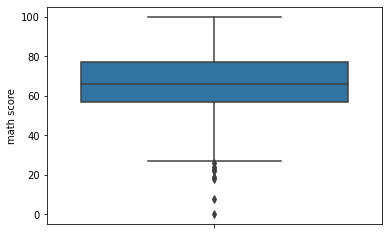

In [5]:
sns.boxplot(data=df, y="math score")

In [10]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

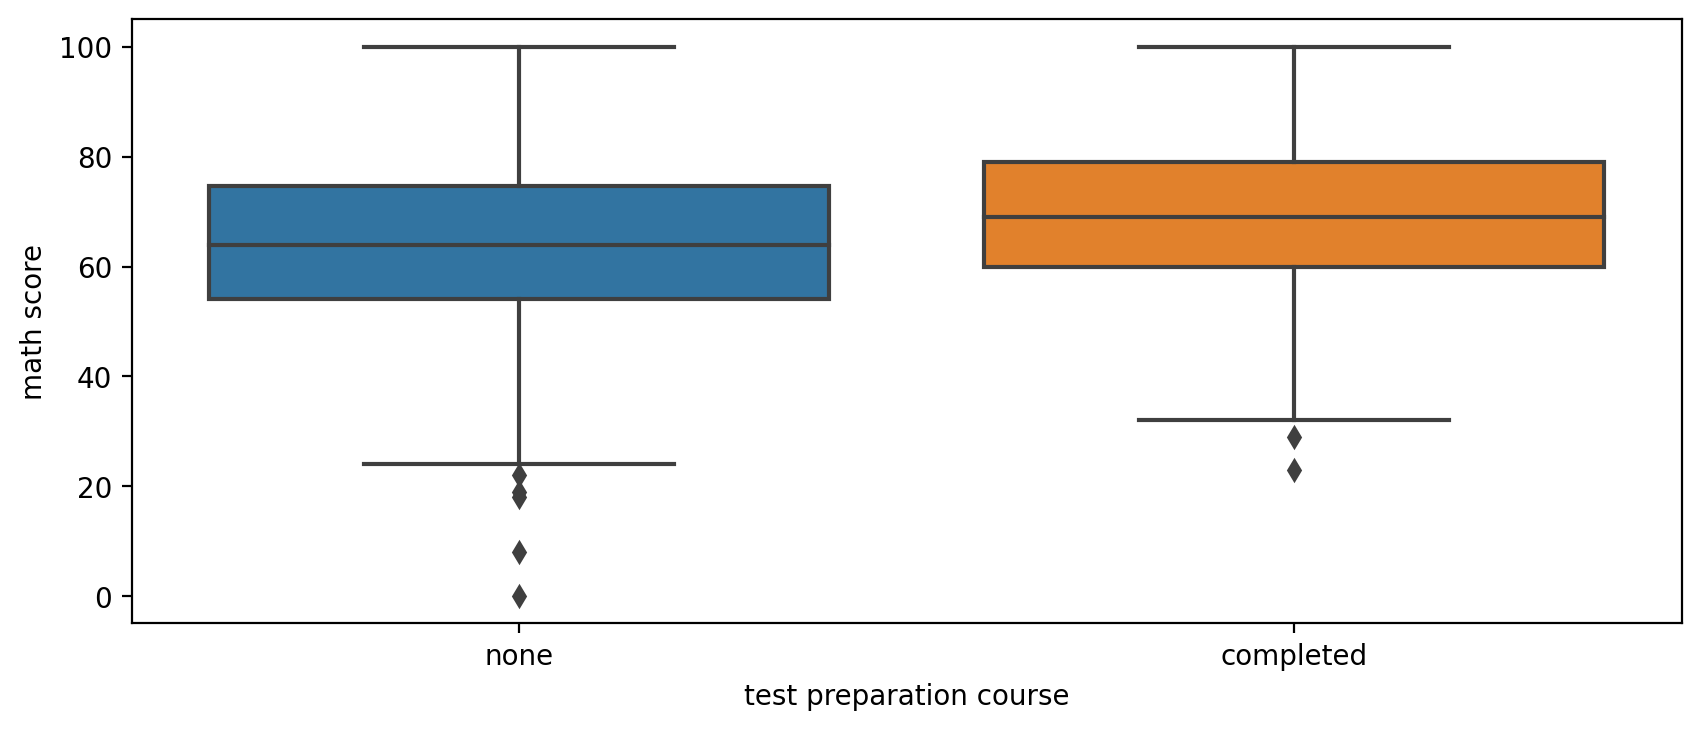

In [9]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, y="math score", x='test preparation course')

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

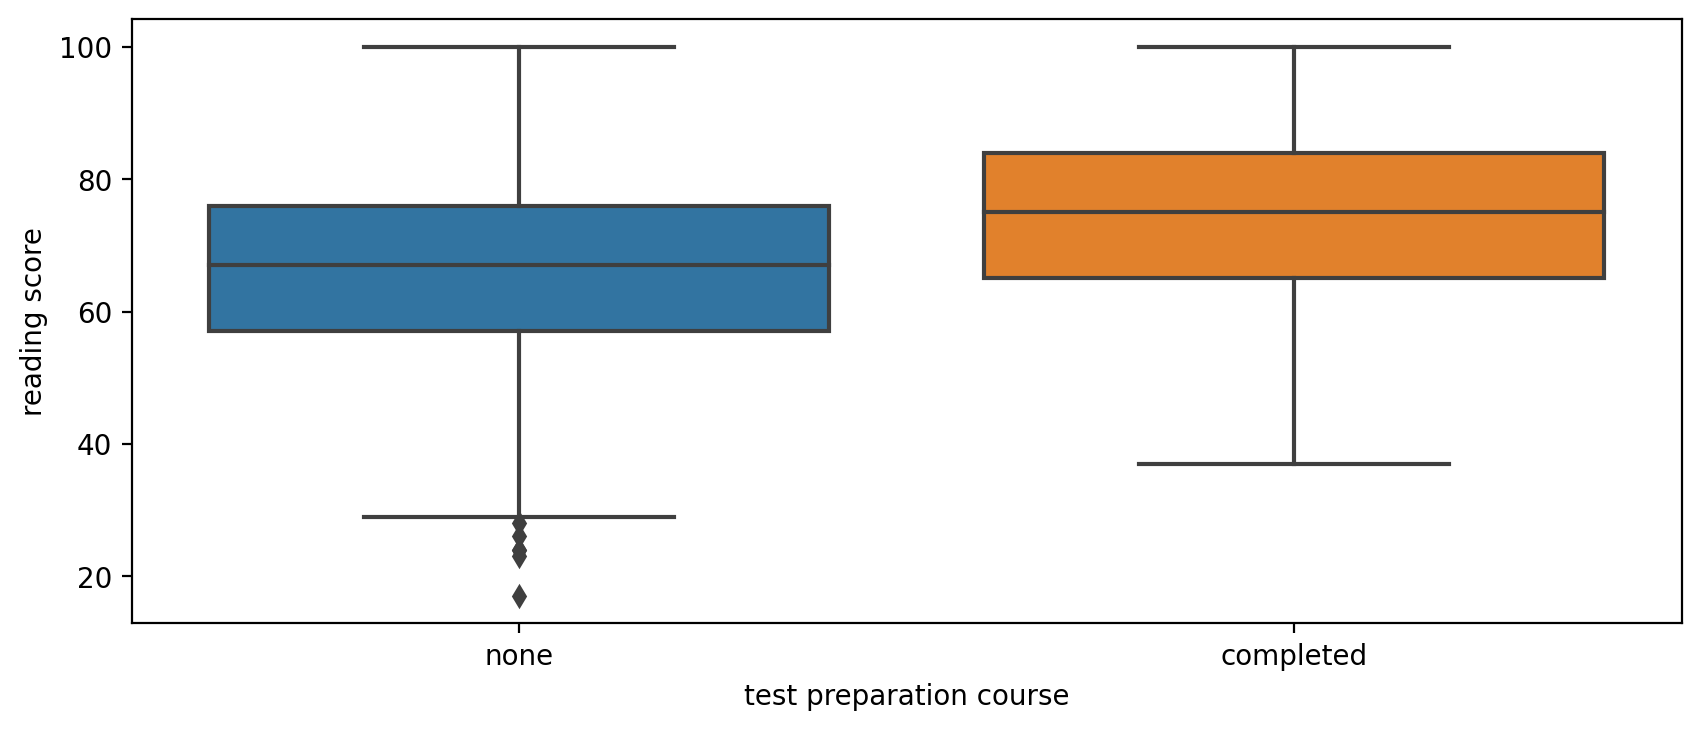

In [11]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, y="reading score", x='test preparation course')

In [14]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

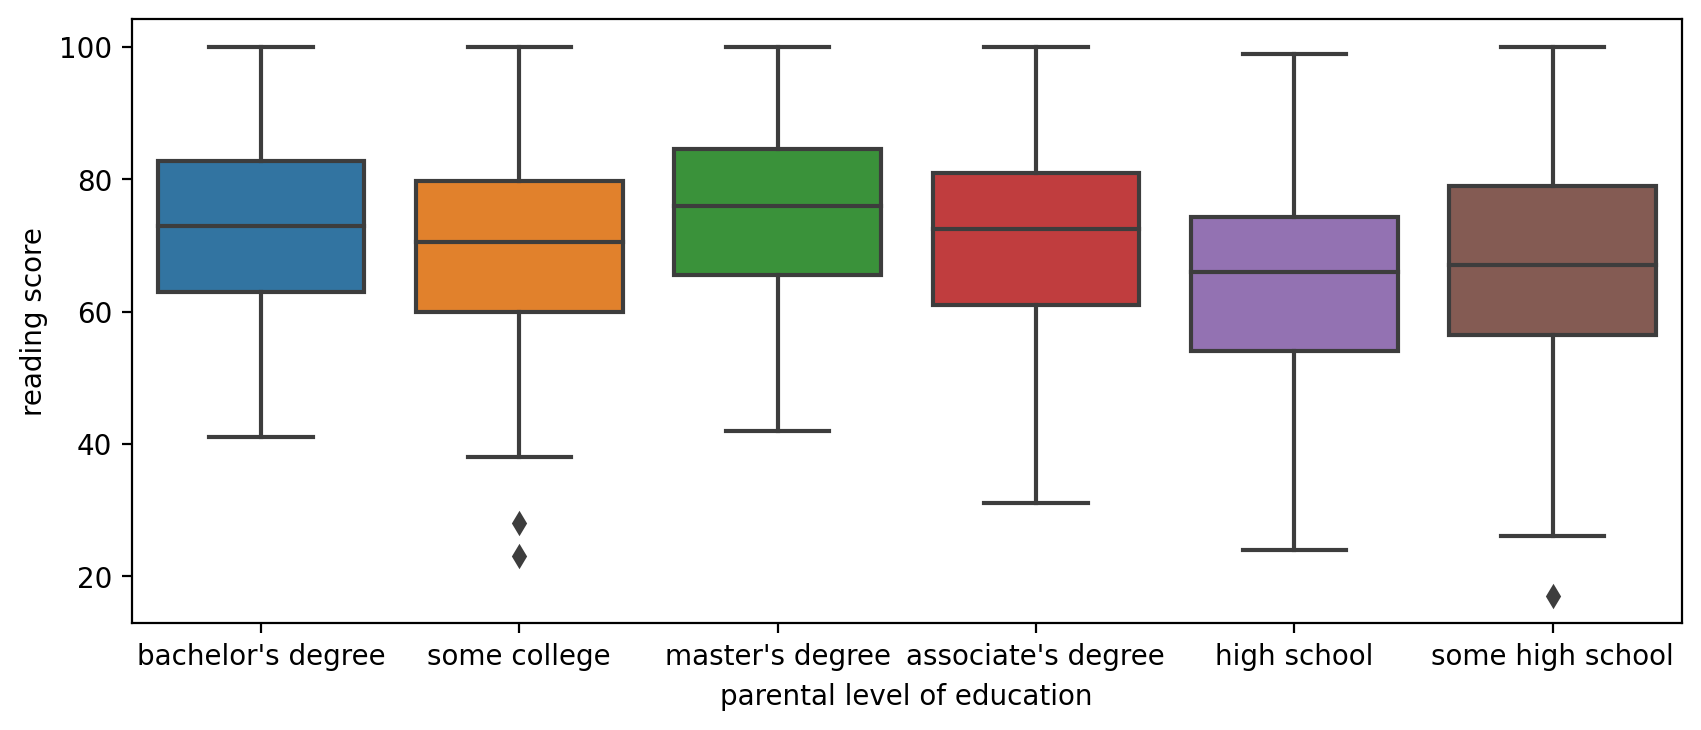

In [12]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, y="reading score", x='parental level of education')

In [16]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

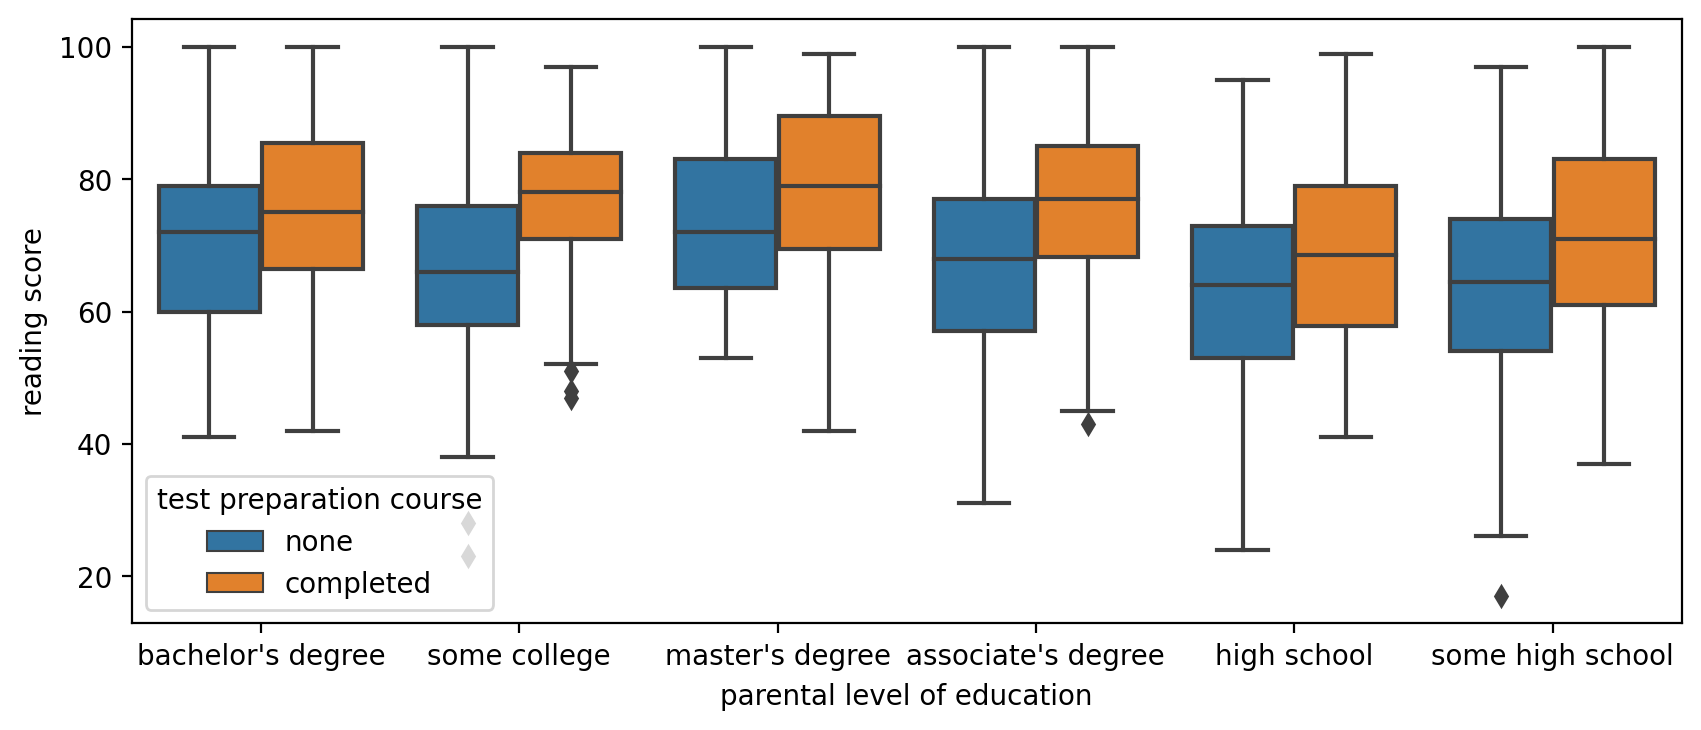

In [15]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, y="reading score", x='parental level of education',
           hue = 'test preparation course')

# hue ile "test preparation course" u sub category yaptık.

# Tam da beklendiği üzere tüm parantal level of education seviyelerinde, test preparation course'u tamamlayan (completed)ların notlarının daha yüksek olduğunu görebiliyoruz.

# legend label'ının default olarak sol aşağıda olduğunu görüyoruz. bunu sağ dışa alalım 

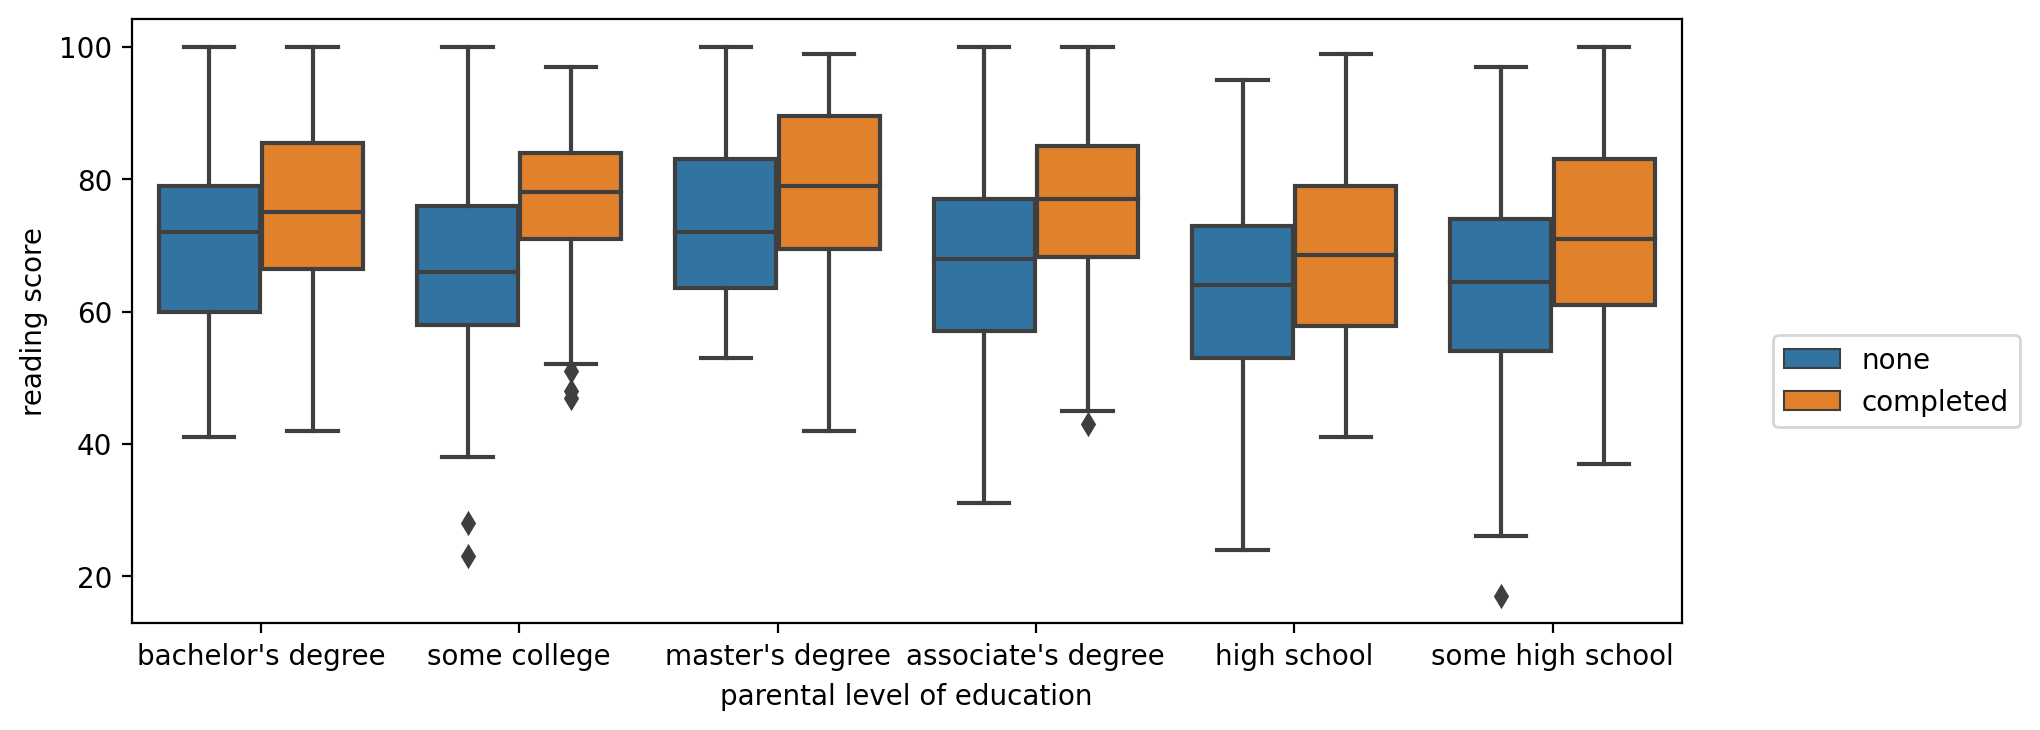

In [17]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, y="reading score", x='parental level of education',
           hue = 'test preparation course')

plt.legend(bbox_to_anchor=(1.05, 0.5))

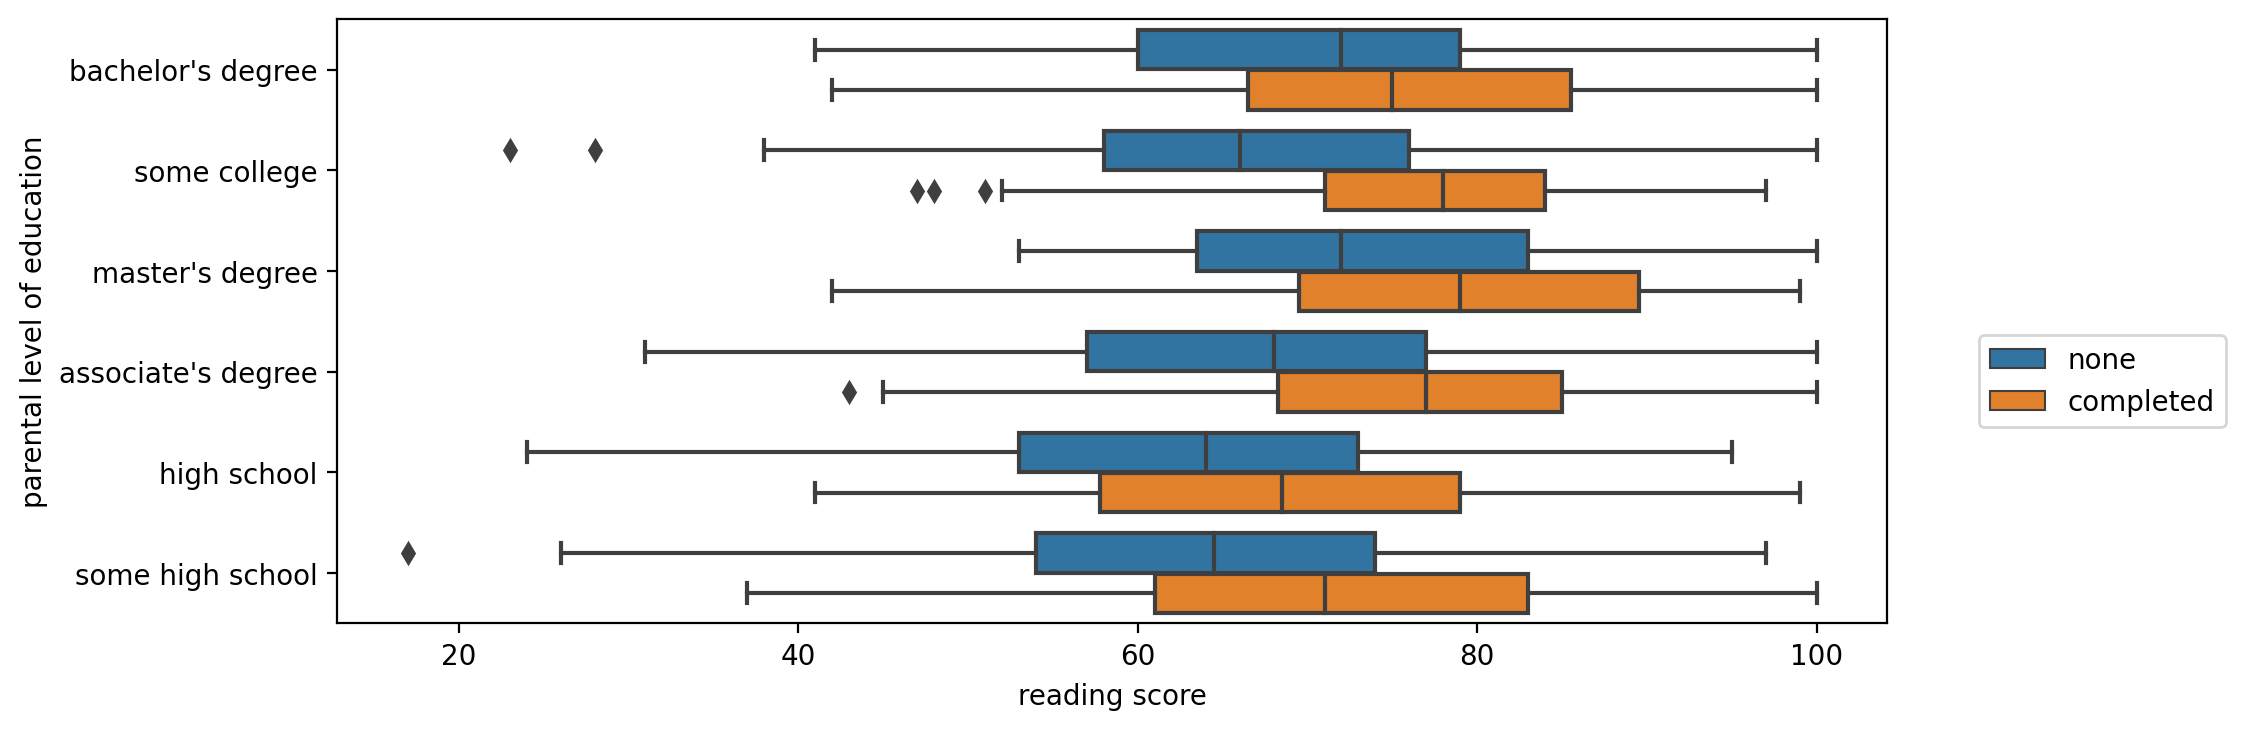

In [18]:
# şimdi x ile y eksinin yer değiştirelim:

plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, x="reading score", y='parental level of education',
           hue = 'test preparation course')

plt.legend(bbox_to_anchor=(1.05, 0.5))

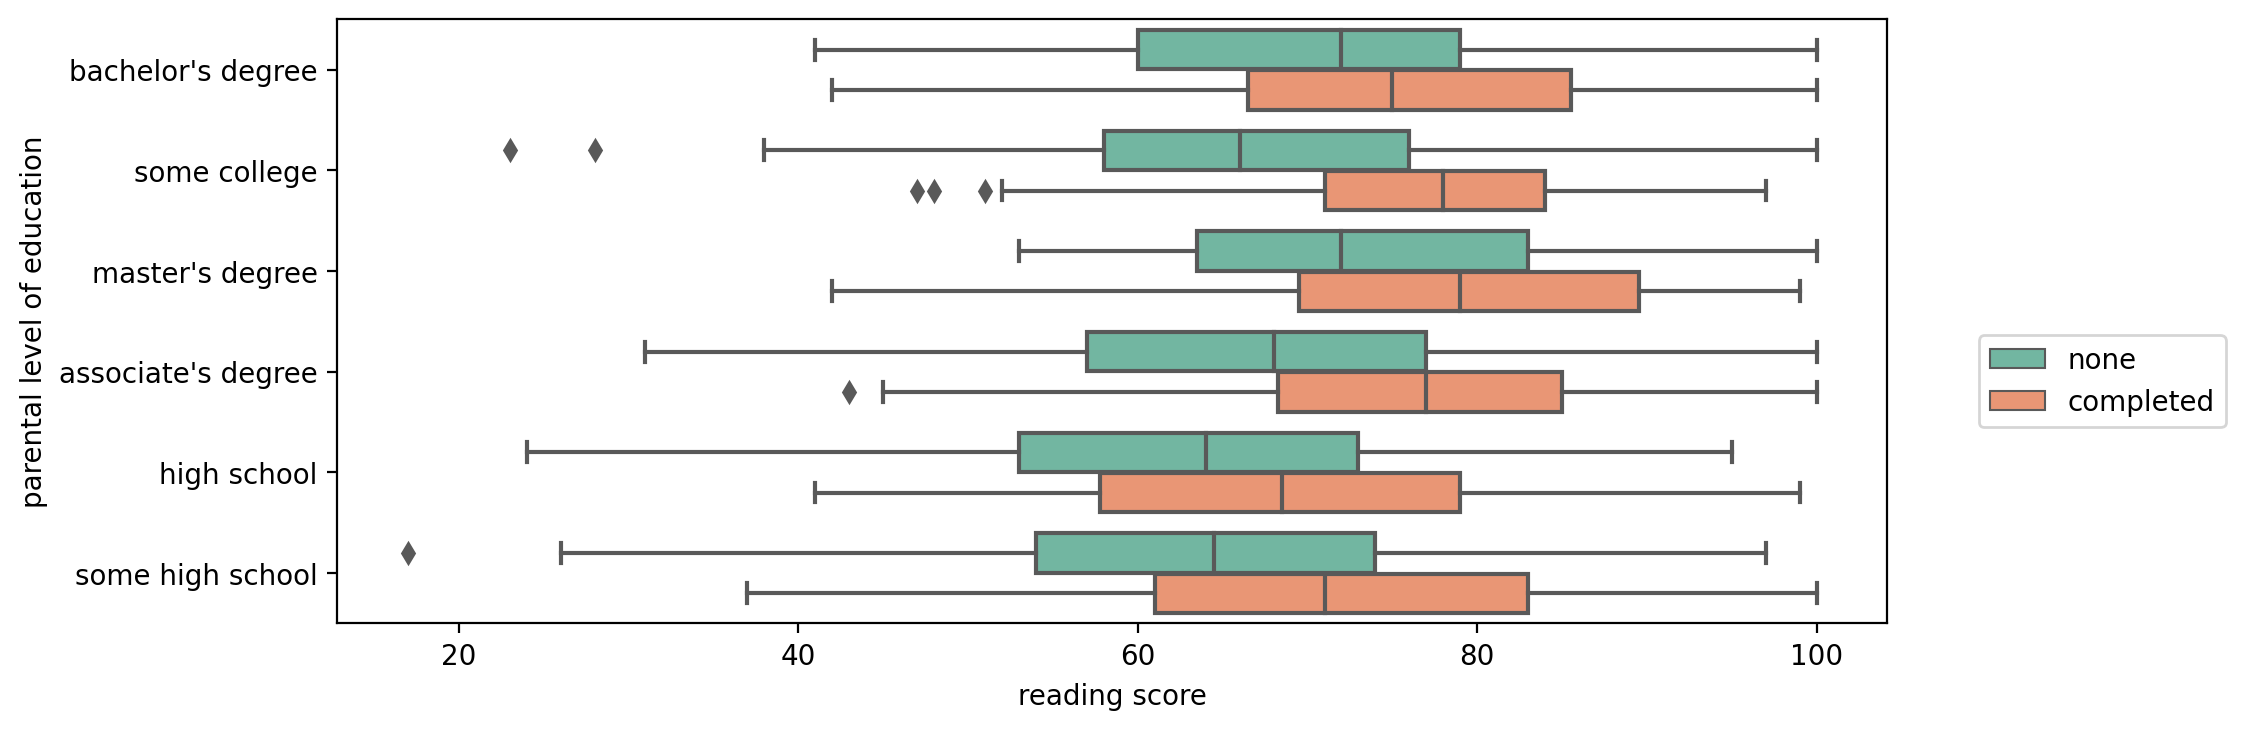

In [19]:
# palette ekleyelim:

plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(data=df, x="reading score", y='parental level of education',
           hue = 'test preparation course',  palette='Set2')

plt.legend(bbox_to_anchor=(1.05, 0.5))

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

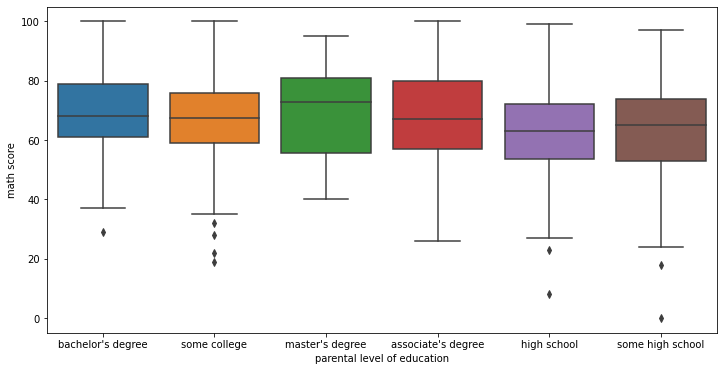

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df)

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,
           hue='test ')

# hue ile subcategory yaptık.

### Adding hue for further segmentation

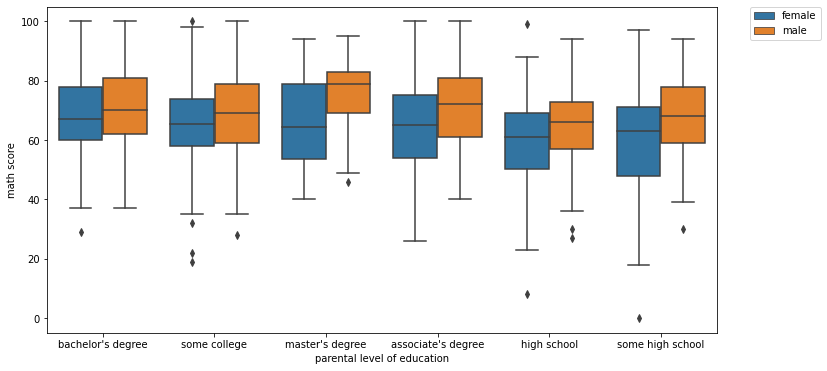

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender')

# Optional move the legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Boxplot Styling Parameters

#### Orientation

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

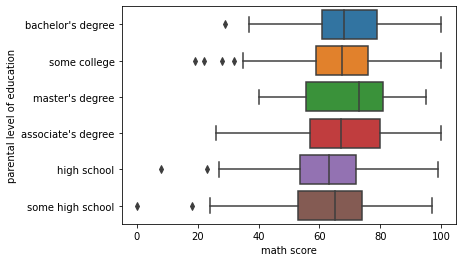

In [6]:
# NOTICE HOW WE HAVE TO SWITCH X AND Y FOR THE ORIENTATION TO MAKE SENSE!

sns.boxplot(x='math score',y='parental level of education',data=df,orient='h')

# box'ları horizantal yaptığımızda math score'lar x ekseninde sergilenmesi gerektiğinden x ile y eksenlerini yer değiştirmek zorundayım.

#### Width

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

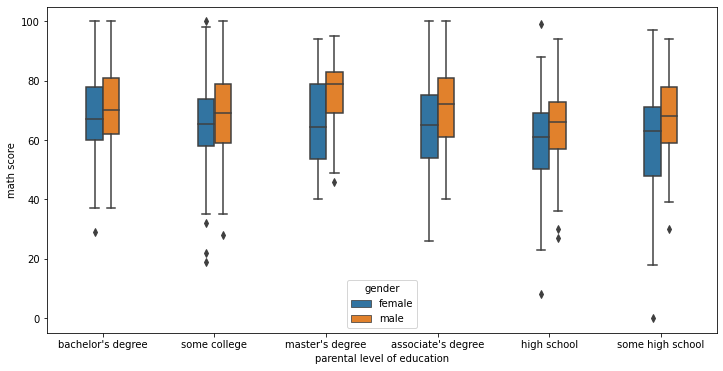

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender',width=0.3)


## Violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

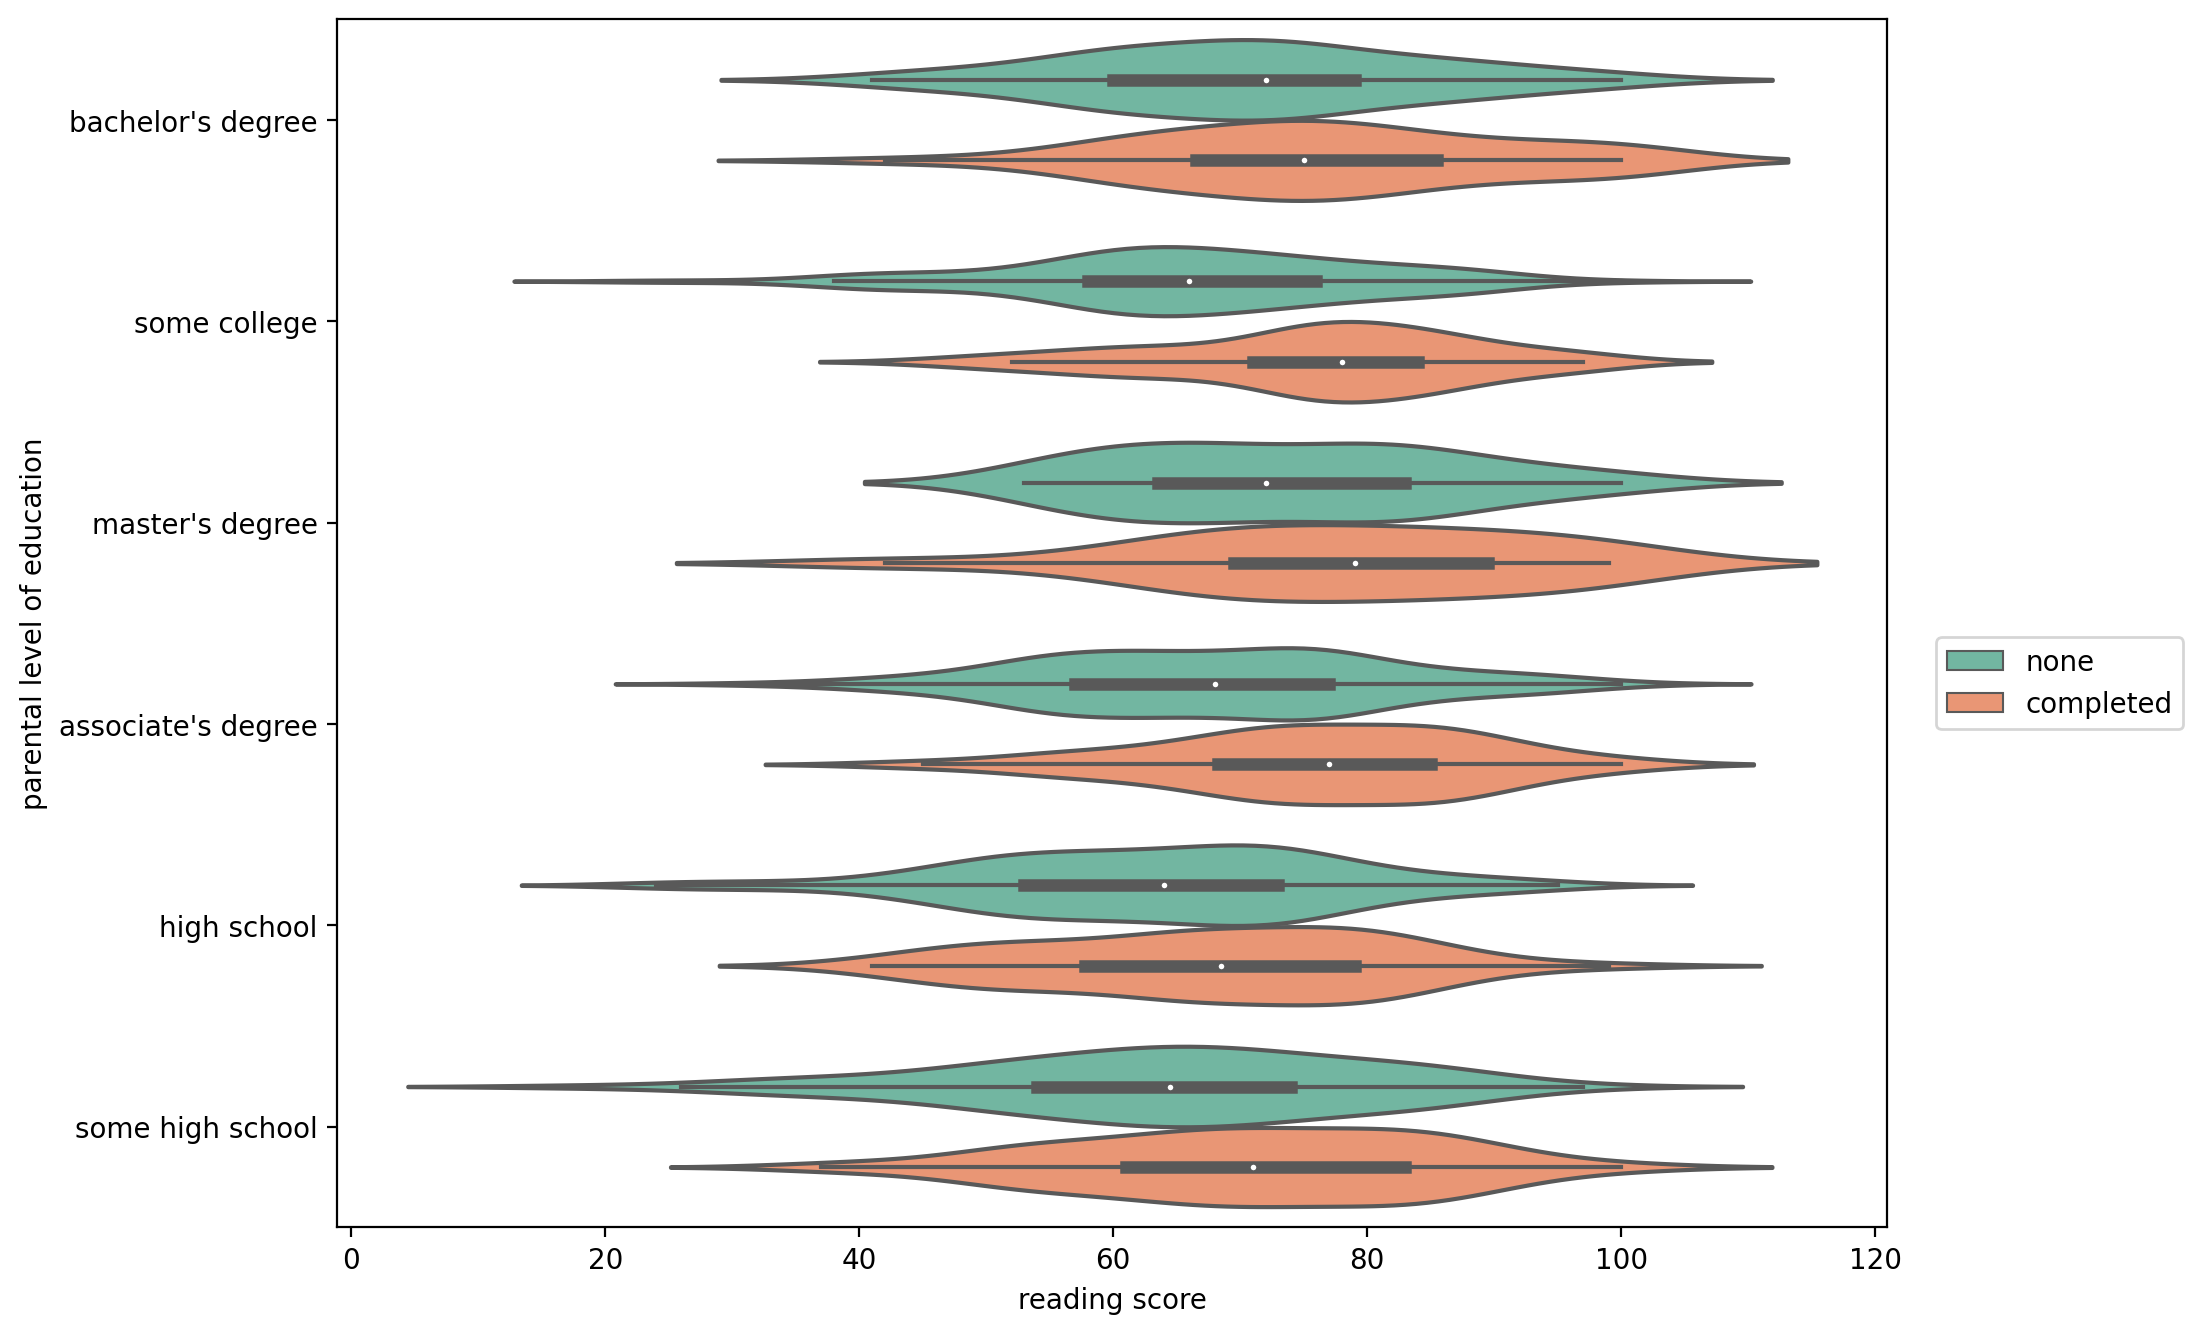

In [27]:
# yukardaki boxplotun aynı verileriyle violinplot yapalım:

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              hue='test preparation course', palette='Set2')

plt.legend(bbox_to_anchor=(1.20, 0.5))

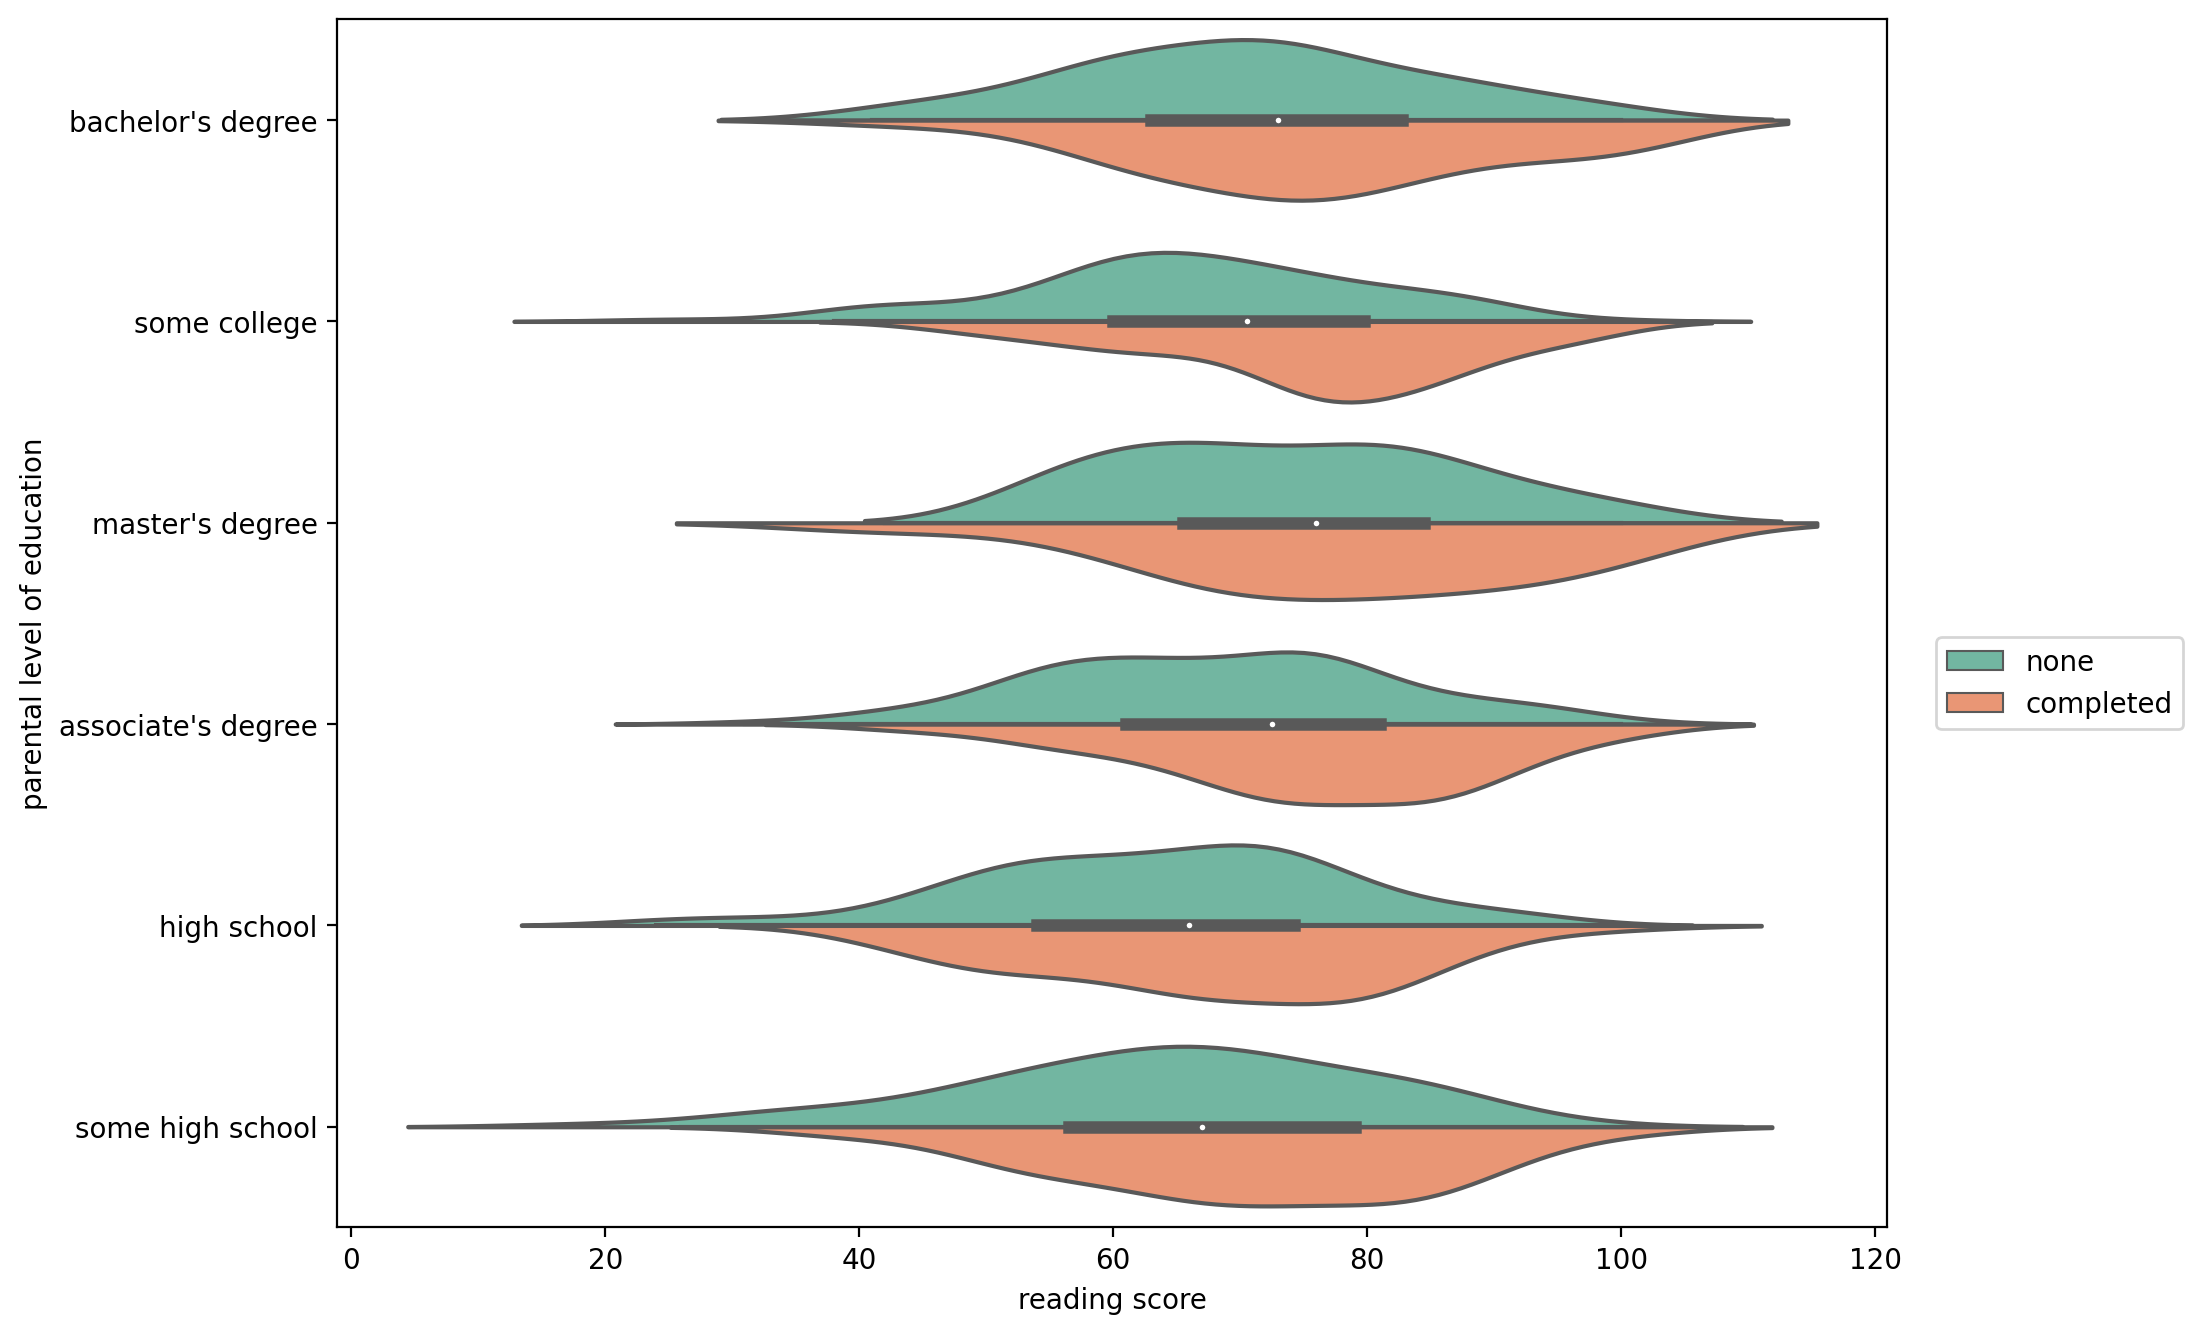

In [28]:
# Split=True ile hue kategorilerini violinlerin içinde gösterdik. böylece violinlerin sayısını 8'den 4'e düştü.
# violinlerin bir yarısı "none", diğer yarısı "comleted" kategorisini gösteriyor.
# dolayısıyla artık violinler simetrik değil. çünkü completed değerleri non'a göre daha yüksek.

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              hue='test preparation course', palette='Set2', 
               split=True)

plt.legend(bbox_to_anchor=(1.20, 0.5))

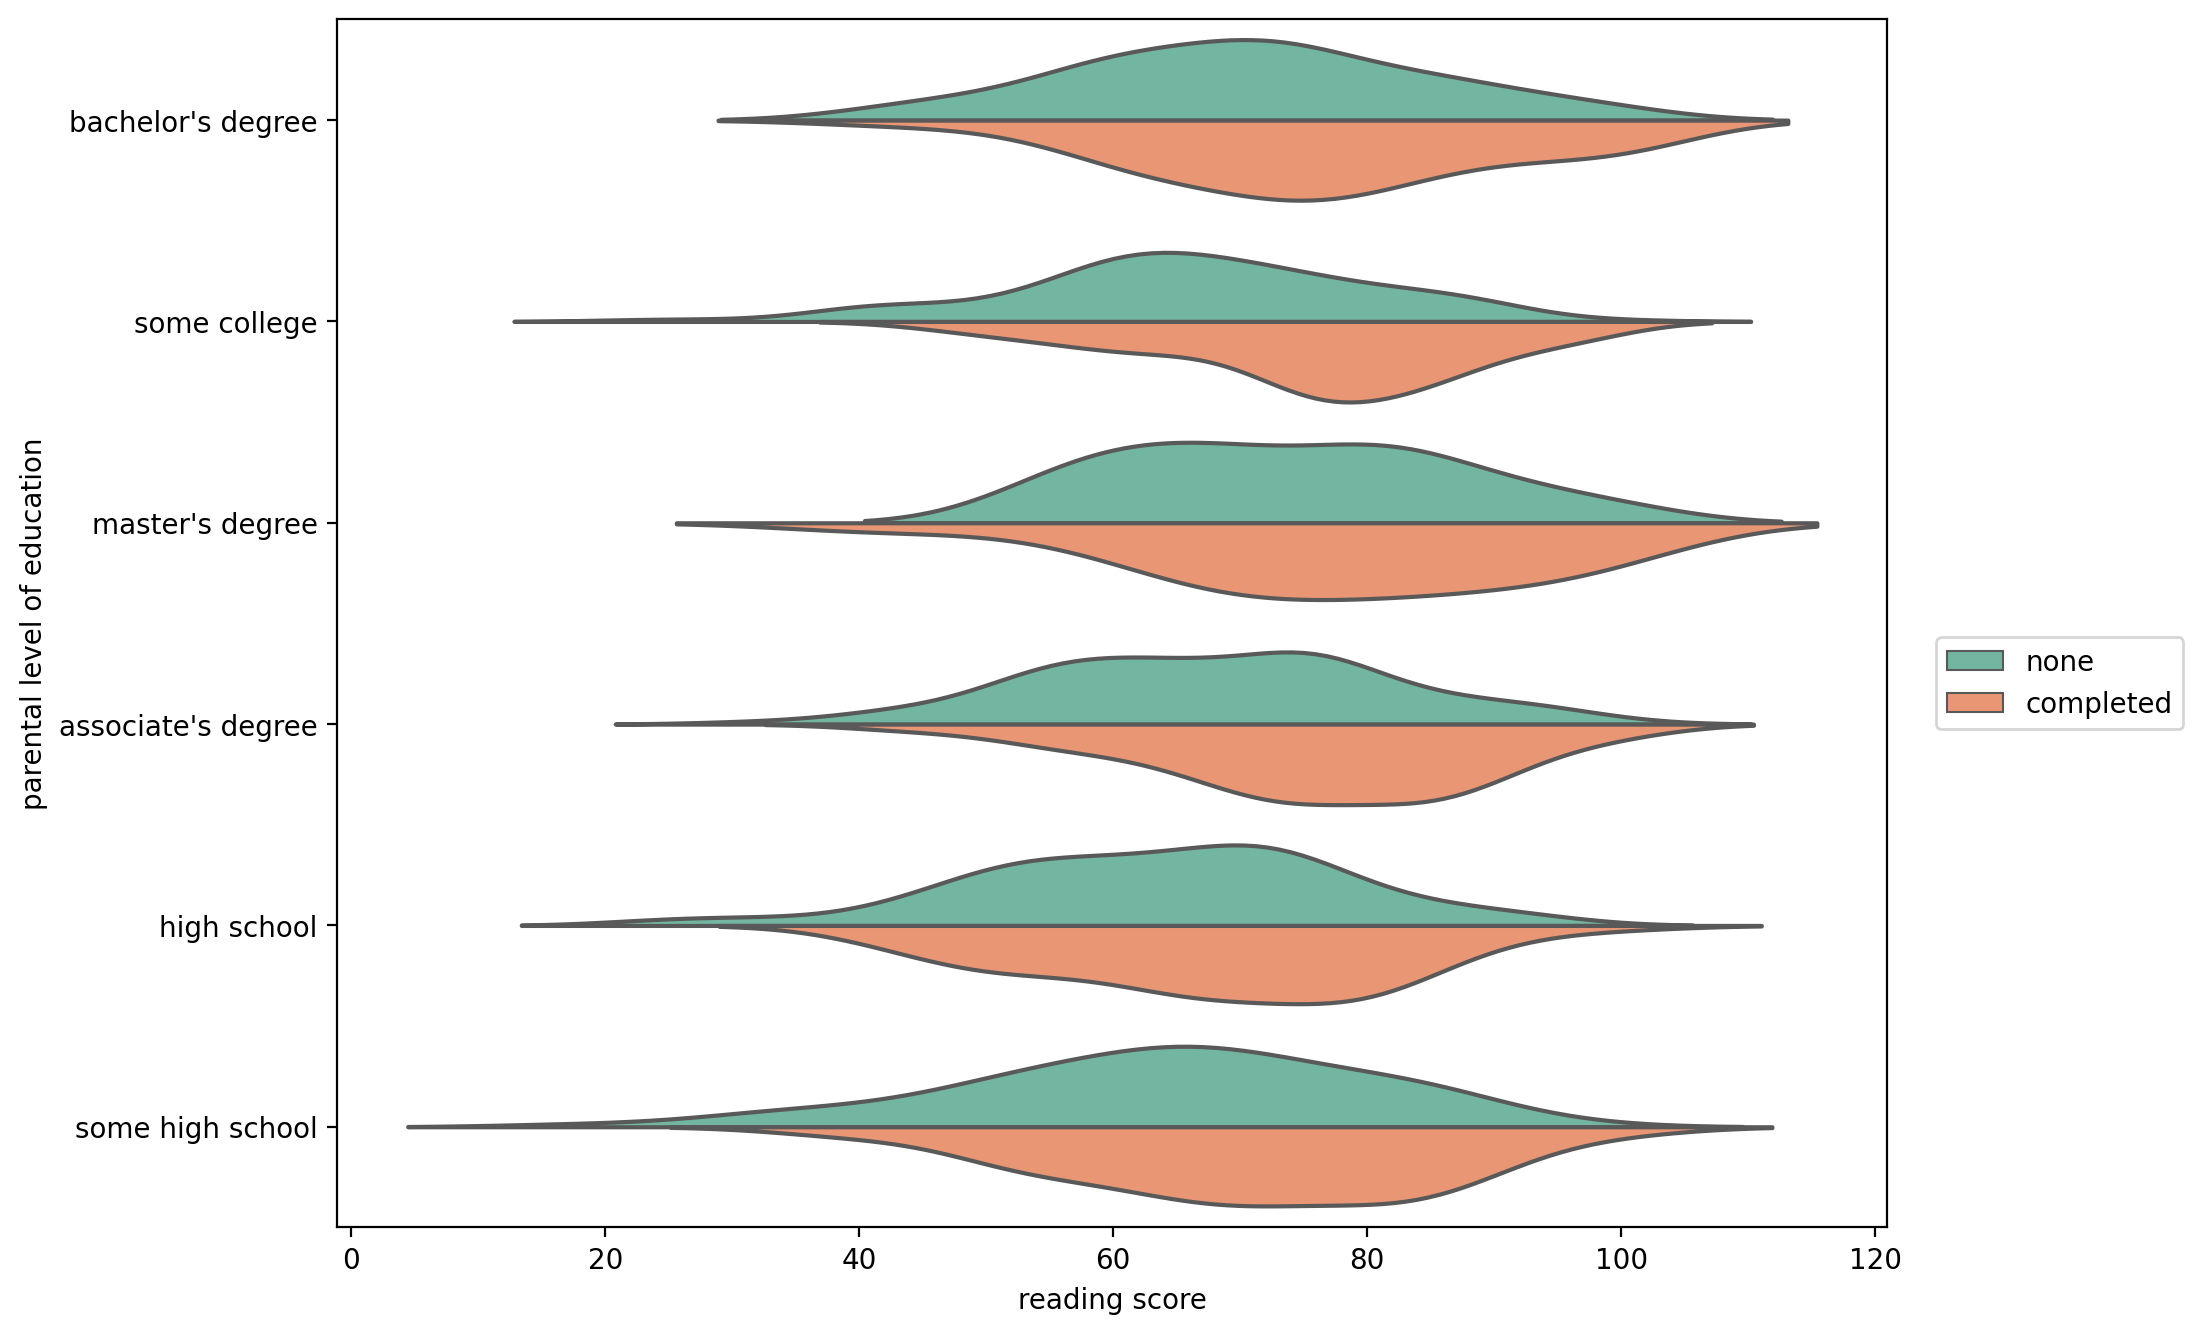

In [29]:
# inner=None ile violinlerin içini boşaltıyoruz

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              hue='test preparation course', palette='Set2', split=True, 
               inner=None)

plt.legend(bbox_to_anchor=(1.20, 0.5))

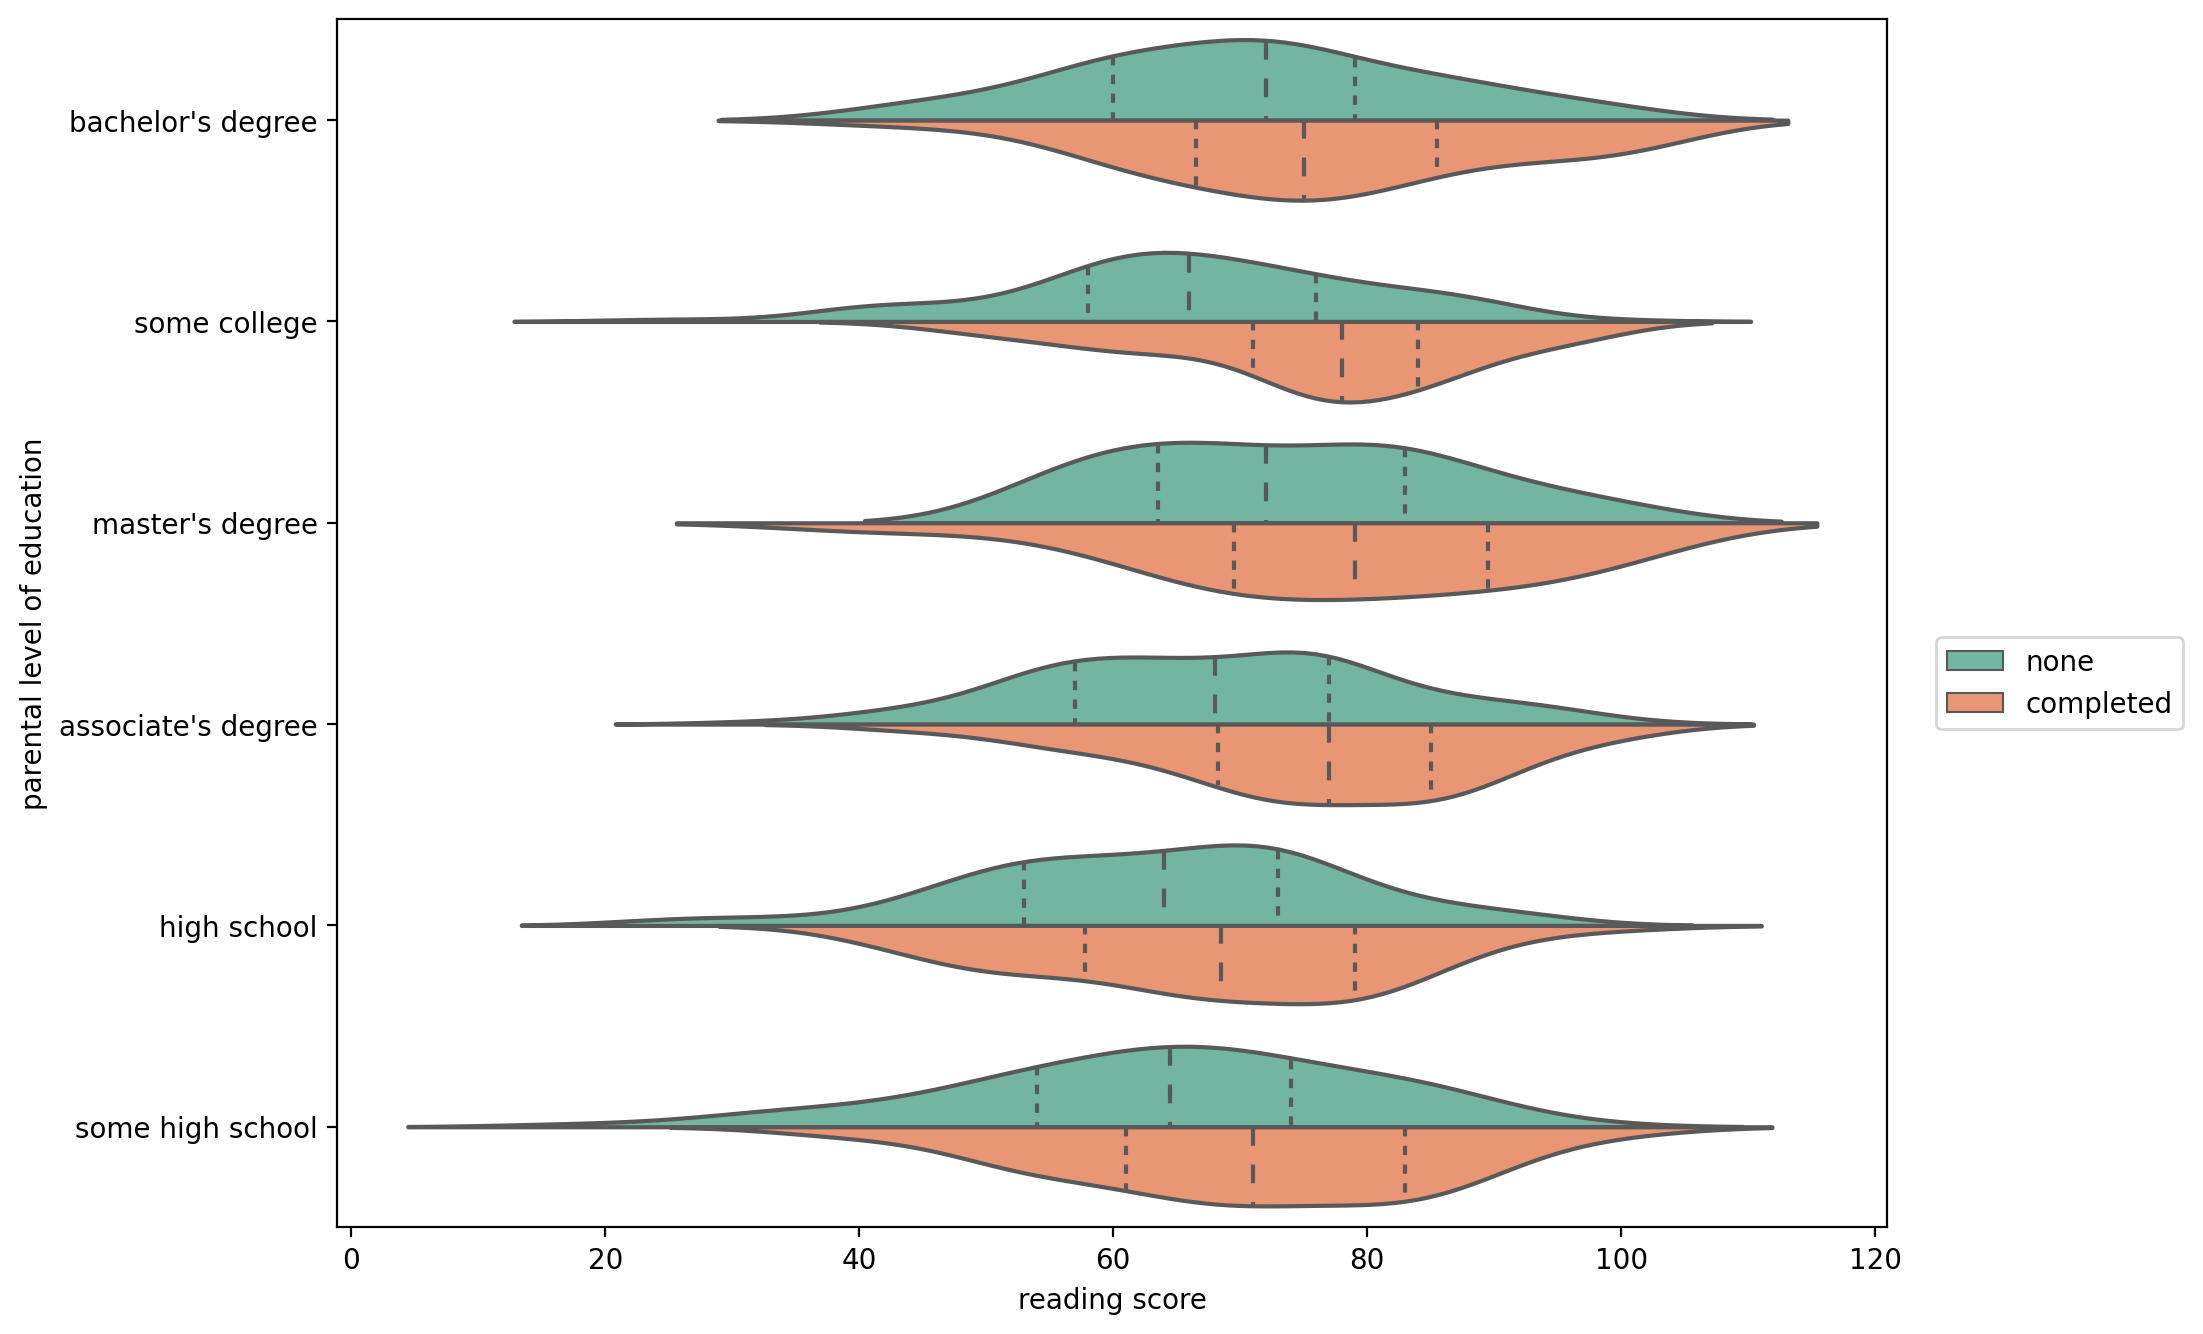

In [30]:
# inner='quartile' ile violinlerin içinde quartile'ları gösteriyoruz:

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              hue='test preparation course', palette='Set2', split=True, 
               inner='quartile')

plt.legend(bbox_to_anchor=(1.20, 0.5))

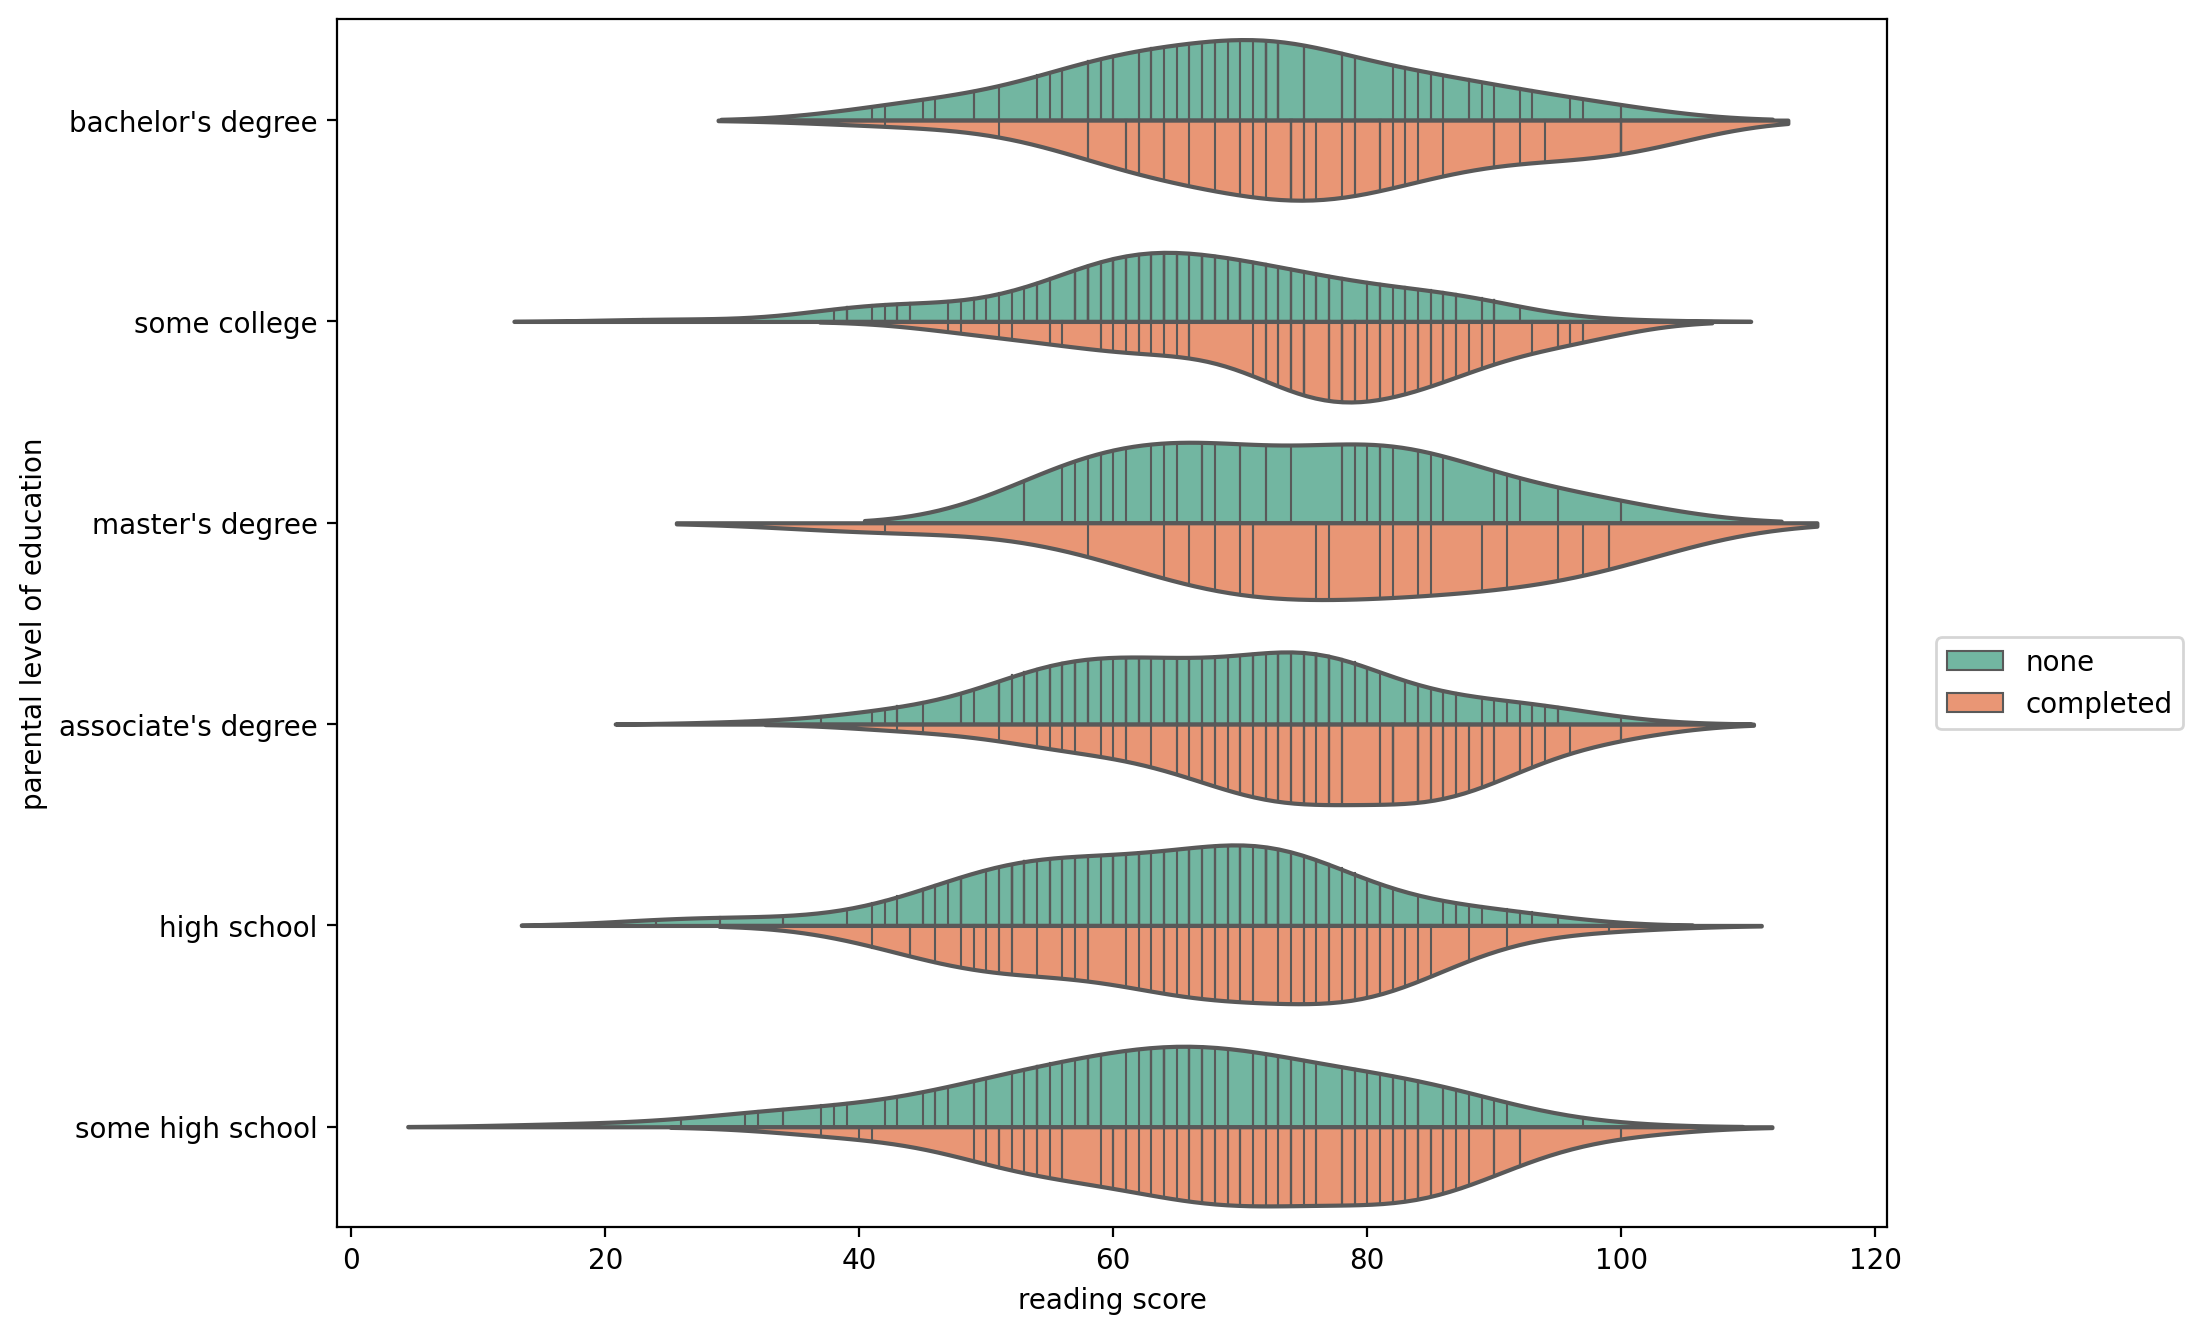

In [31]:
# inner='stick' : draw a line for every instance. kind of showing you the distribution
 
plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              hue='test preparation course', palette='Set2', split=True, 
               inner='stick')

plt.legend(bbox_to_anchor=(1.20, 0.5))

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

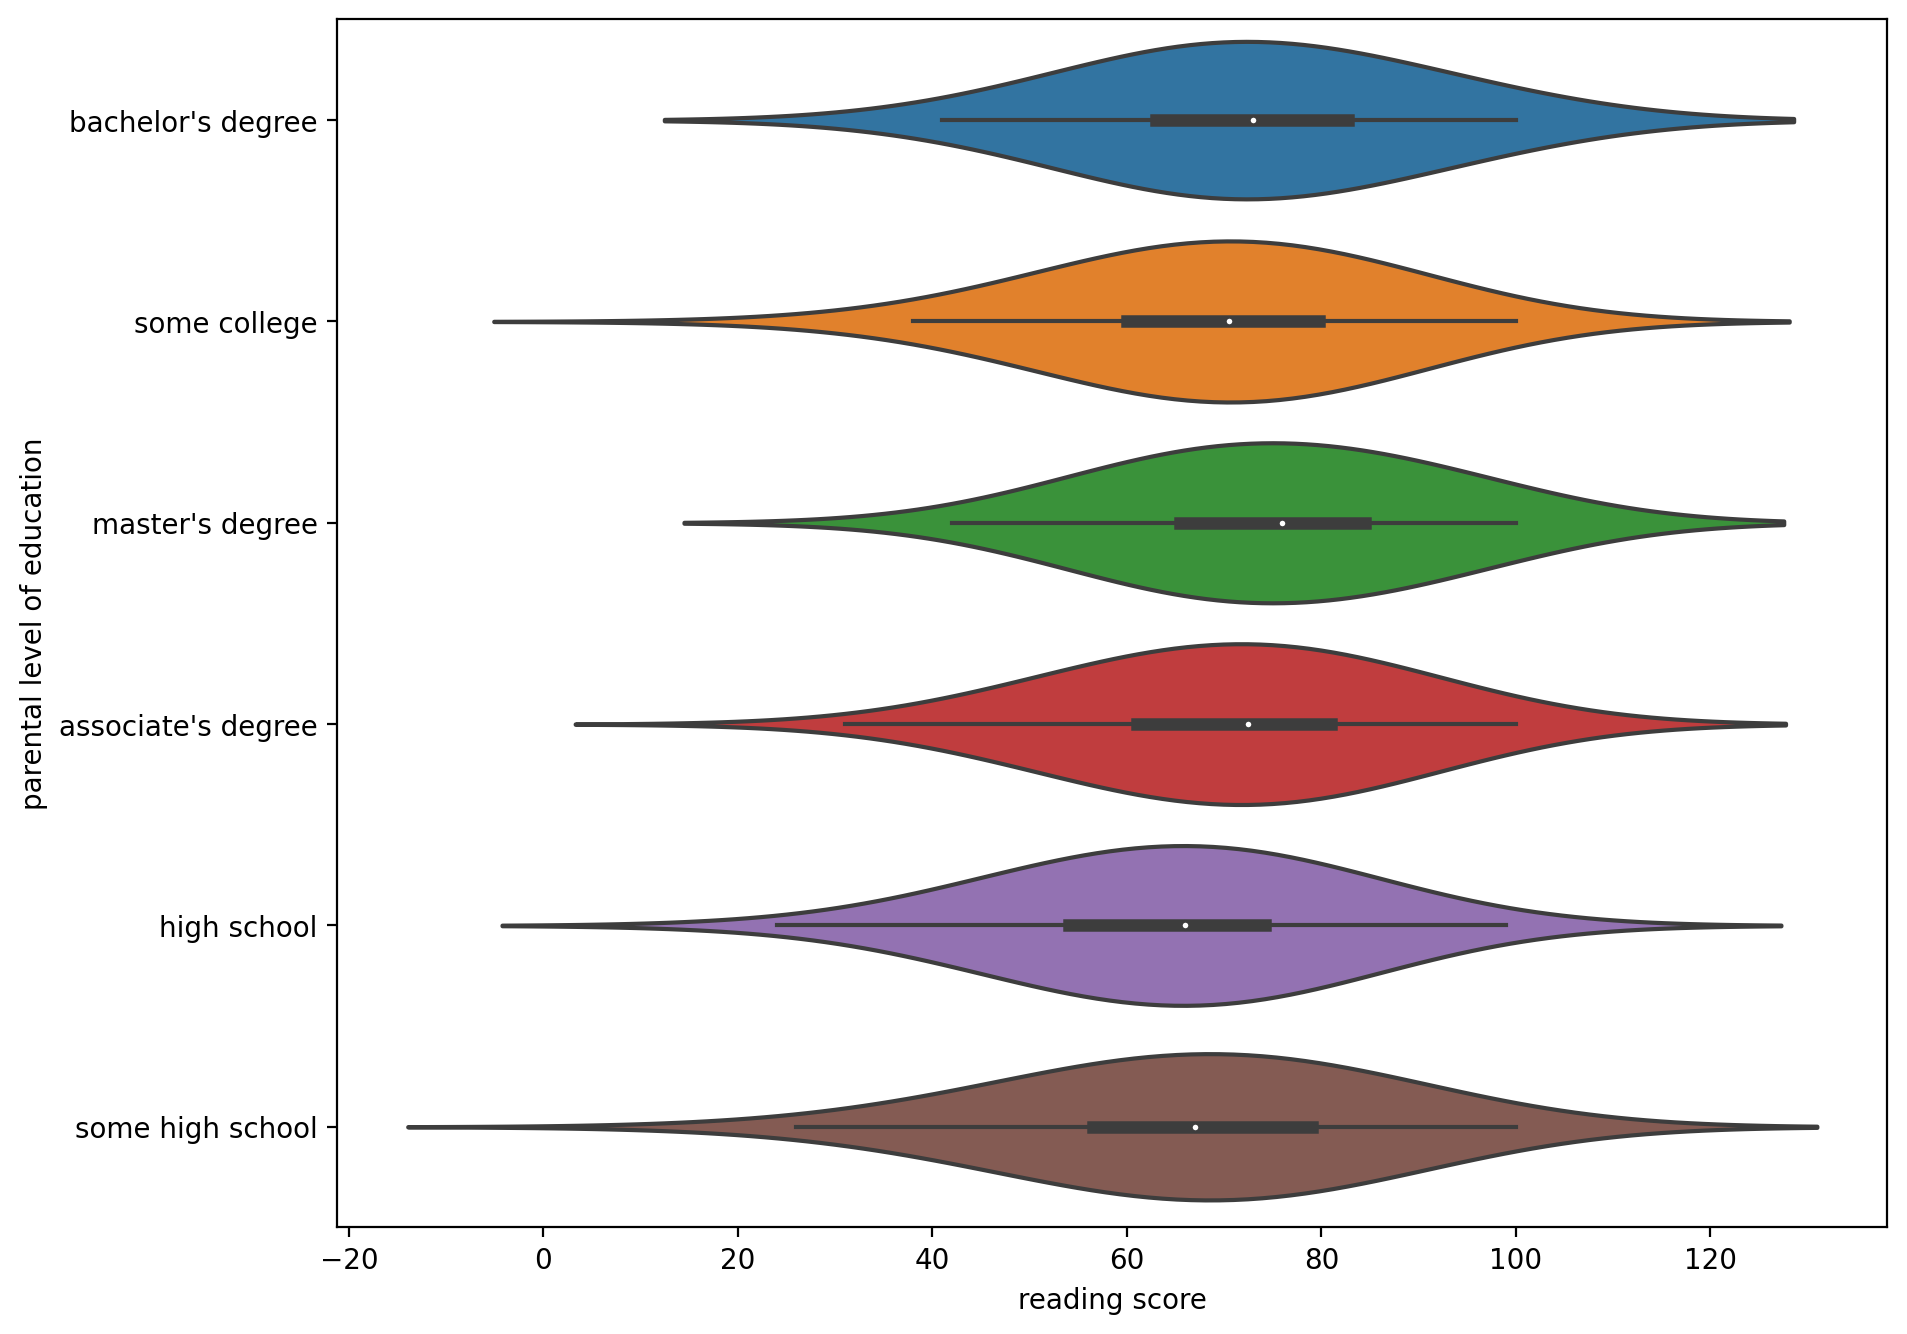

In [36]:
# bandwidth (bw) değer girerek violinlerin detayları ile oynayabiliriz. 1 değeri çok büyük olduğu için violinler çok kabaca çizildi.

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              bw=1)

# plt.legend(bbox_to_anchor=(1.20, 0.5))

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

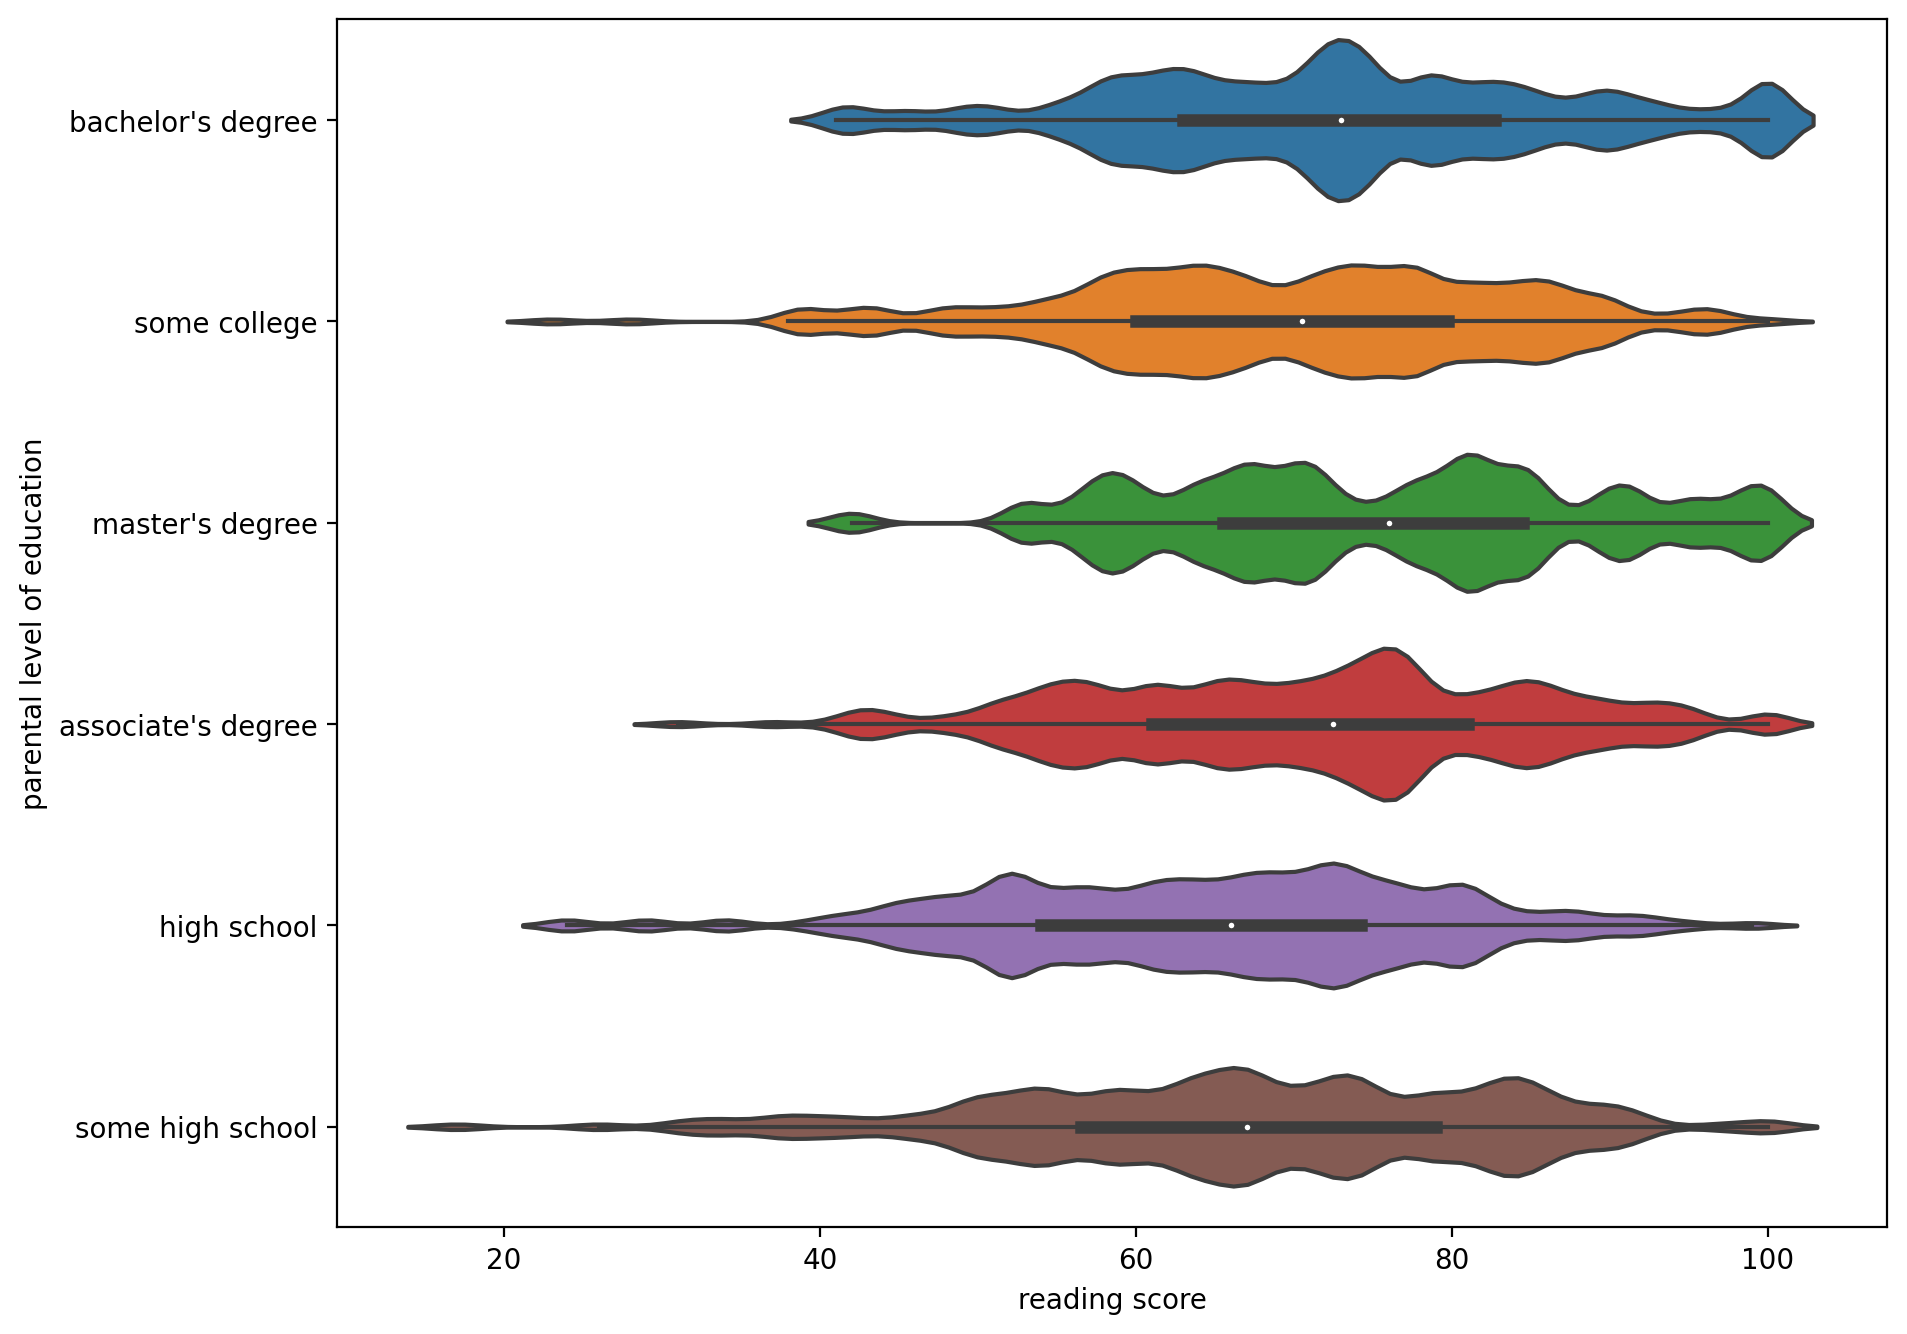

In [35]:
# bandwidth (bw) 0.1 girdim ve detaylar arttı.

plt.figure(figsize=(10,8),dpi=200)

sns.violinplot(data=df, x="reading score", y='parental level of education',
              bw=0.1)

# plt.legend(bbox_to_anchor=(1.20, 0.5))

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

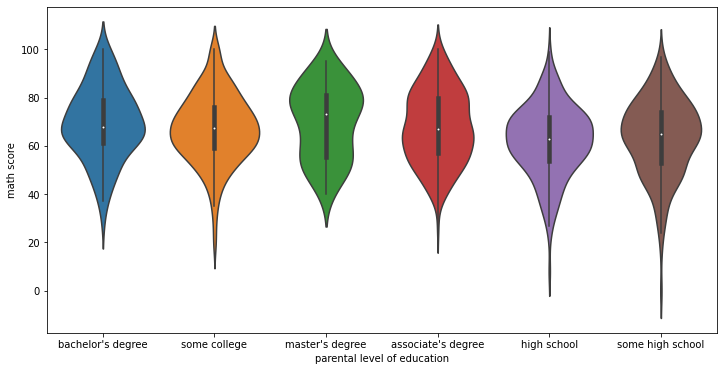

In [8]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

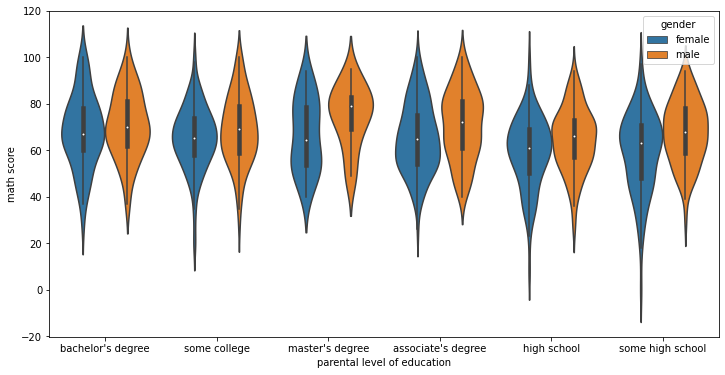

In [9]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,hue='gender')

### Violinplot Parameters

#### split
When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

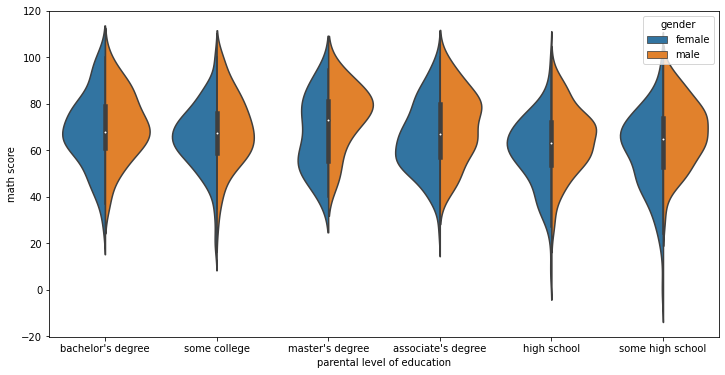

In [10]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,hue='gender',split=True)

#### inner

Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

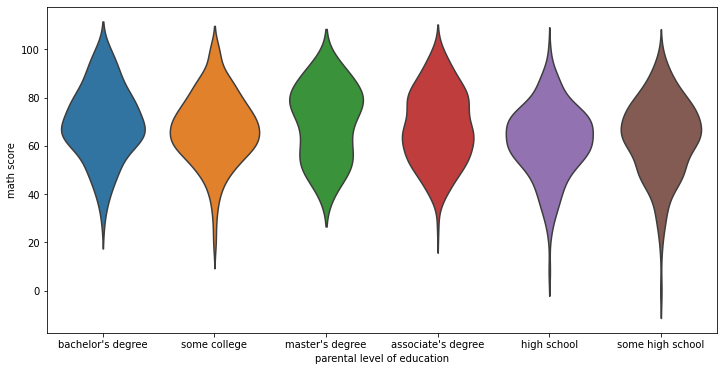

In [11]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner=None)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

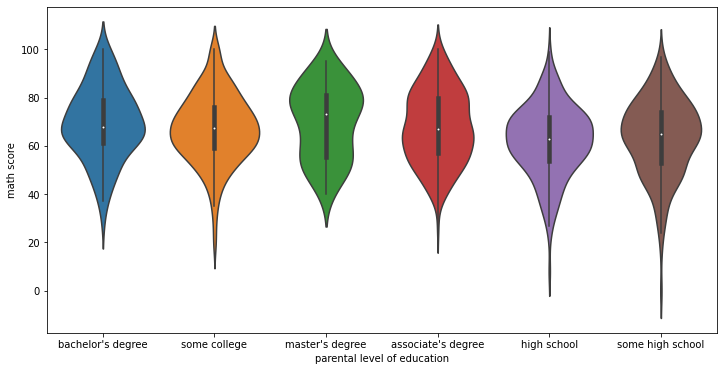

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='box')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

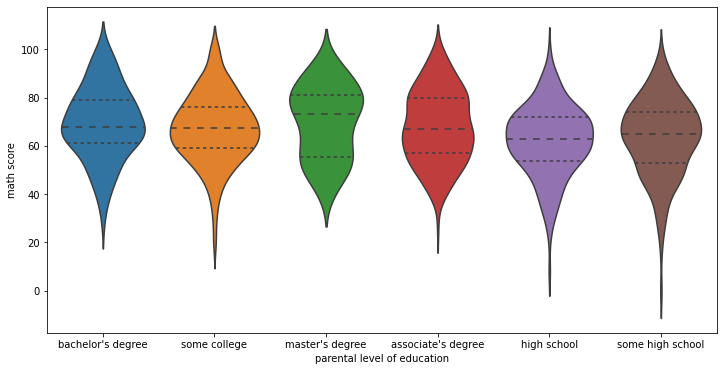

In [13]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='quartile')

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

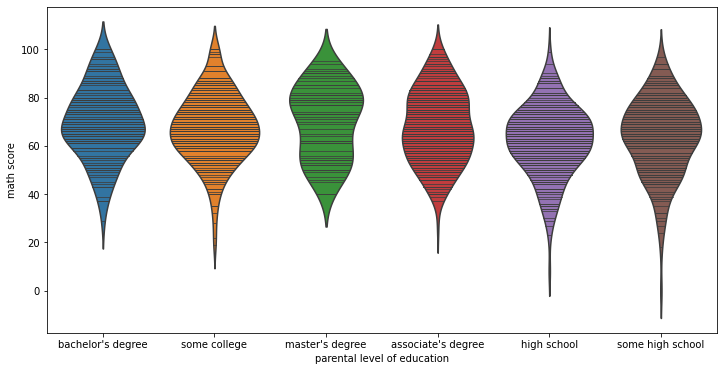

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,inner='stick')

#### orientation

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

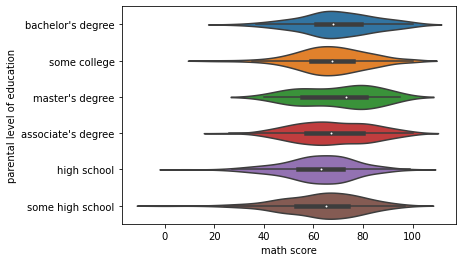

In [15]:
# Simply switch the continuous variable to y and the categorical to x
sns.violinplot(x='math score',y='parental level of education',data=df,)

#### bandwidth

Similar to bandwidth argument for kdeplot

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

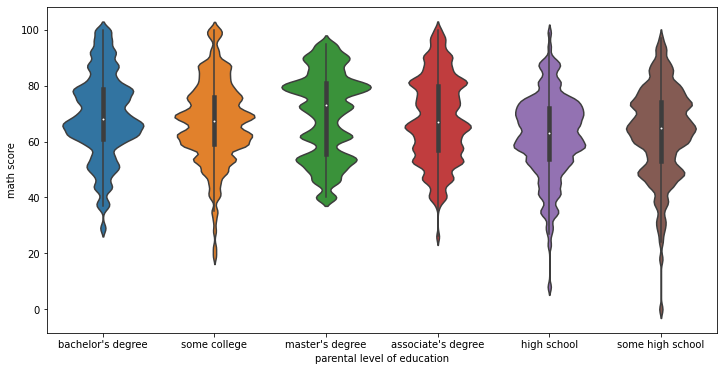

In [16]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df,bw=0.1)

# Advanced Plots

We can use a boxenplot and swarmplot to achieve the same effect as the boxplot and violinplot, but with slightly more information included. Be careful when using these plots, as they often require you to educate the viewer with how the plot is actually constructed. Only use these if you are sure your audience will understand the visualization.

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## swarmplot

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

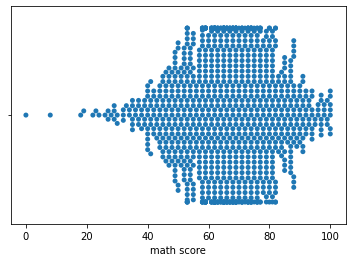

In [38]:
sns.swarmplot(data=df, x='math score')

# 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot uyarısına dikkat!

# ya nokta size'ını küçülteceğim ya da figure size'ını büyüteceğim.

<AxesSubplot:xlabel='math score'>

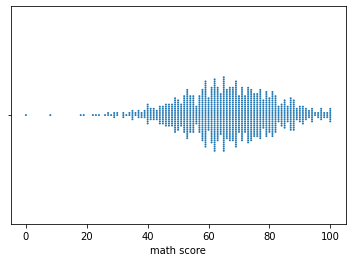

In [39]:
sns.swarmplot(x='math score',data=df,size=2)

# nokta size'ını küçülttüm.

<AxesSubplot:xlabel='math score'>

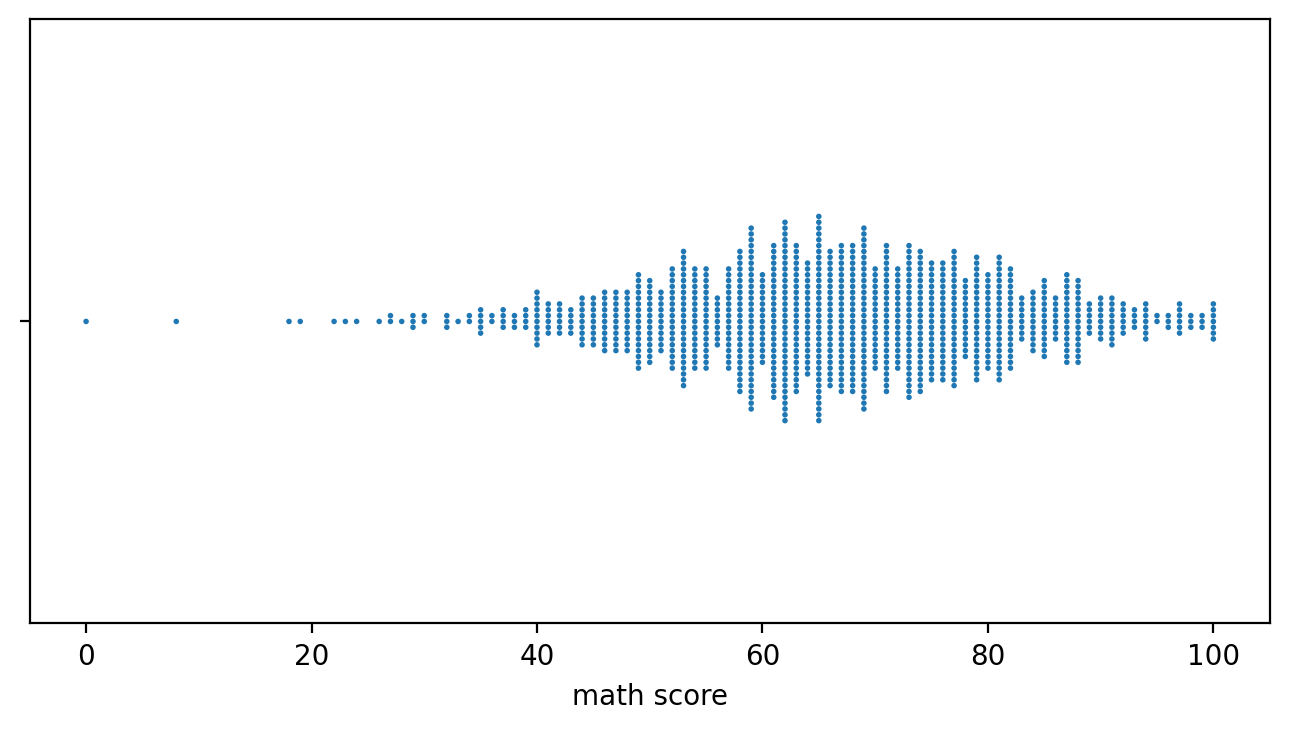

In [40]:
plt.figure(figsize=(8,4), dpi=200)
sns.swarmplot(x='math score',data=df,size=2)

#figsize'ı büyüttüm.

<AxesSubplot:xlabel='math score', ylabel='gender'>

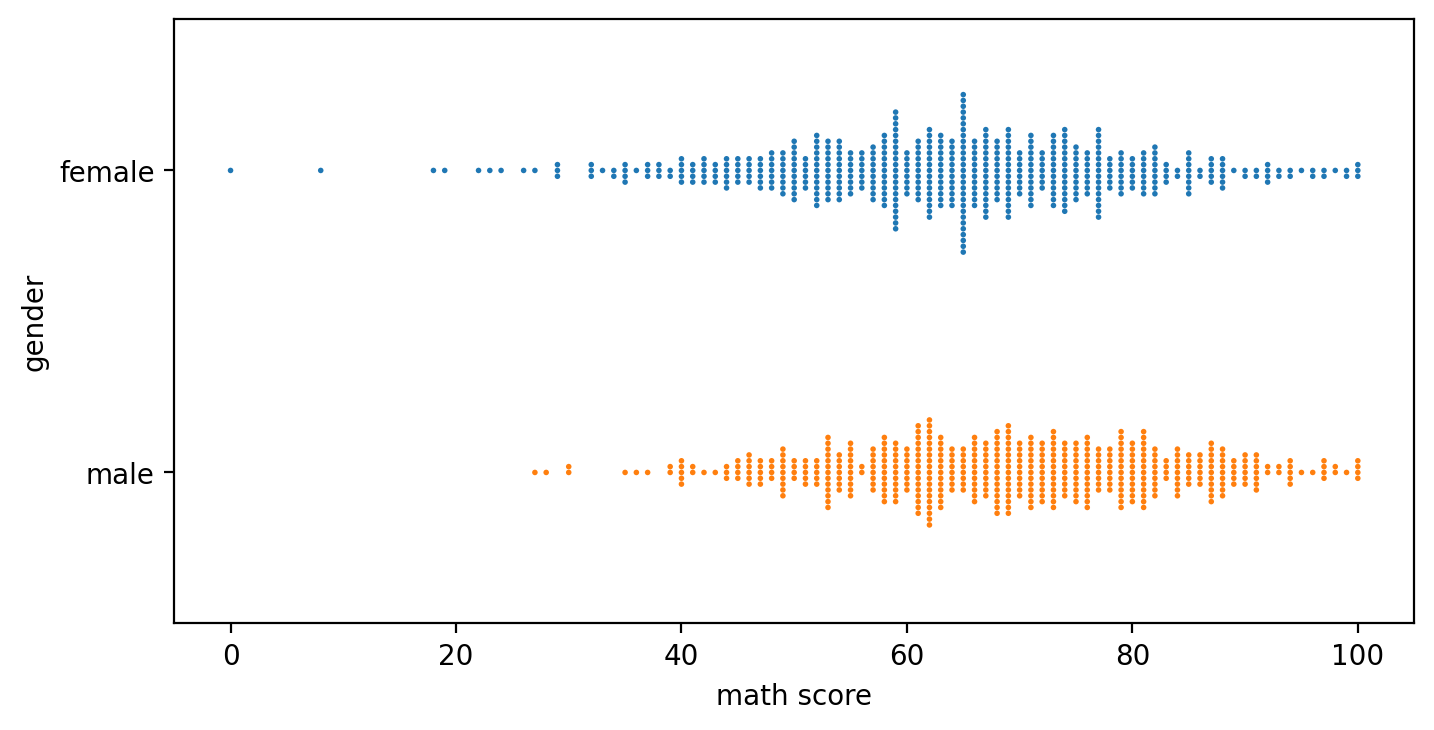

In [41]:
plt.figure(figsize=(8,4), dpi=200)
sns.swarmplot(x='math score', y='gender', data=df,size=2)

# 2. swarmplot olarak gender'ı ekledim. şimdi y ekseninde gender'ın value'ları var.

<AxesSubplot:xlabel='math score', ylabel='gender'>

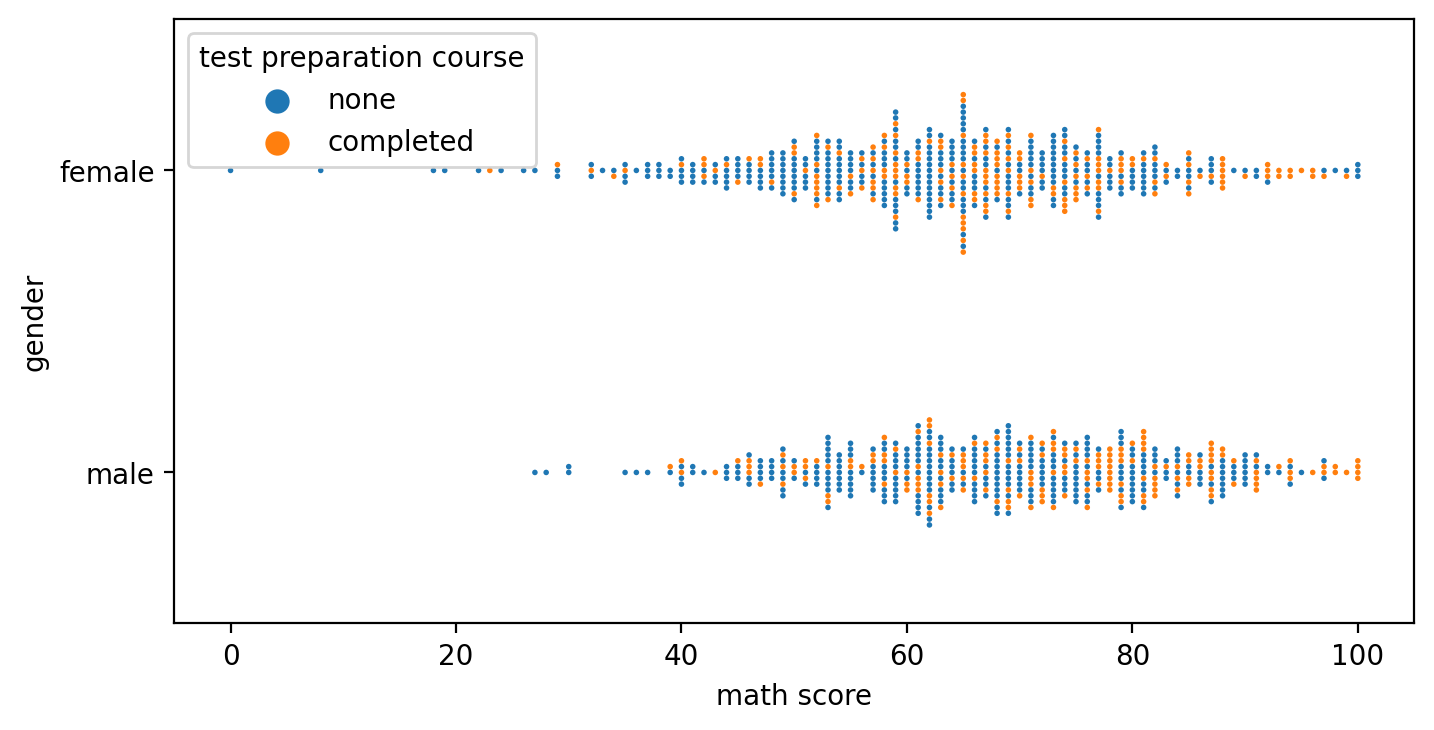

In [42]:
plt.figure(figsize=(8,4), dpi=200)
sns.swarmplot(x='math score', y='gender', data=df,size=2,
             hue='test preparation course')

# hue ile sub category ekledim.

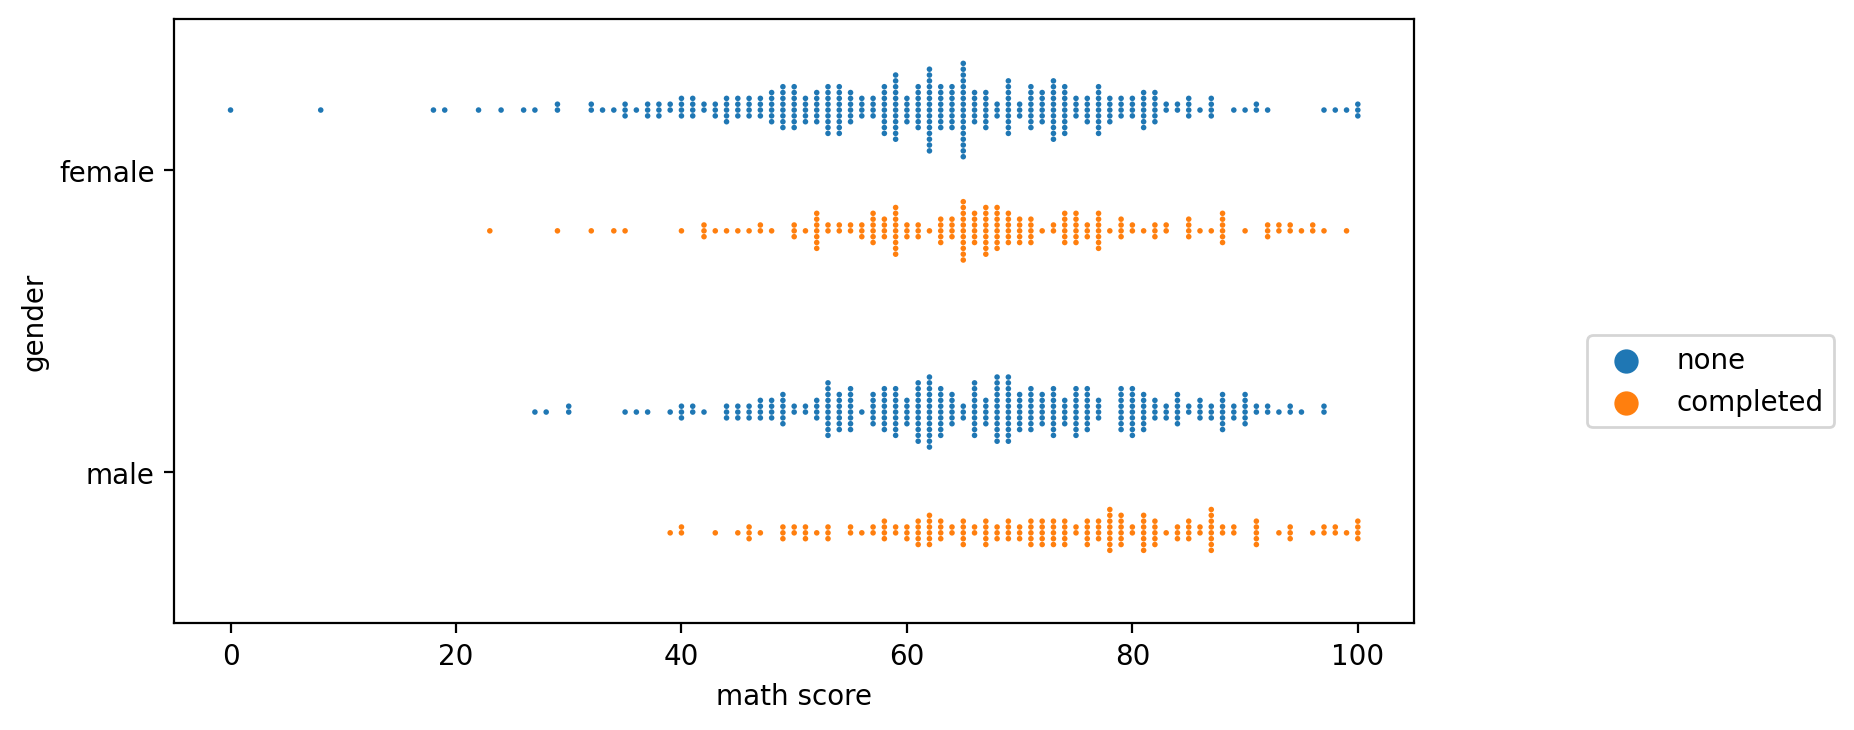

In [44]:
plt.figure(figsize=(8,4), dpi=200)
sns.swarmplot(x='math score', y='gender', data=df,size=2,
             hue='test preparation course', dodge=True)

plt.legend(bbox_to_anchor=(1.35,0.5)) 

# dodge=True ile alt kategorinin noktalarını ayırıp ayrı plotlattım.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

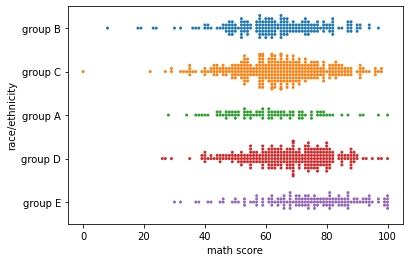

In [30]:
sns.swarmplot(x='math score',y='race/ethnicity',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

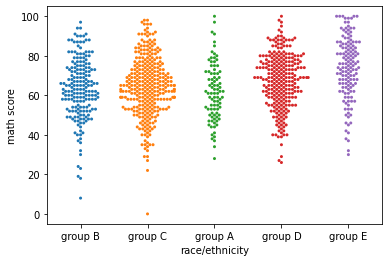

In [31]:
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

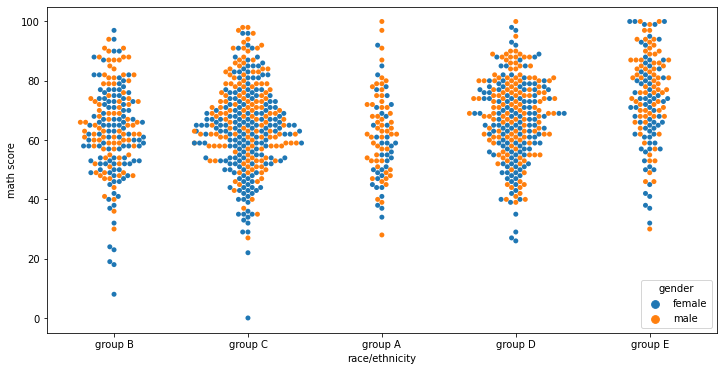

In [21]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender')

c:\users\marcial\anaconda3\envs\ml_master\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

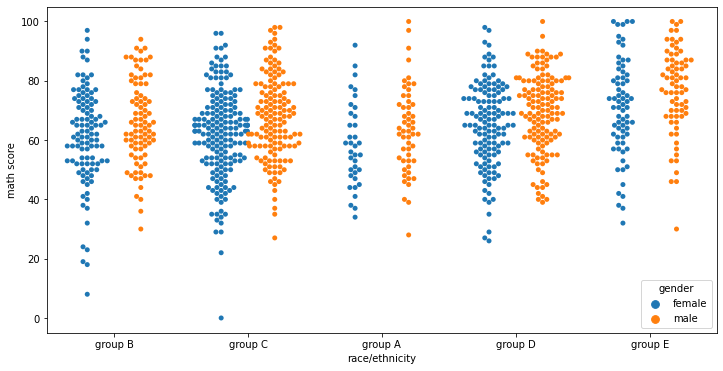

In [22]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender',dodge=True)

### boxenplot (letter-value plot)

Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

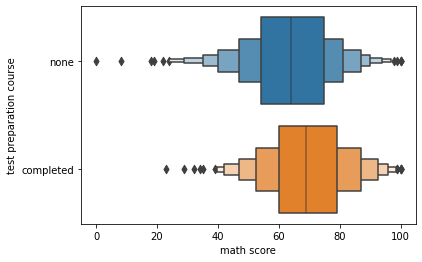

In [45]:
sns.boxenplot(x='math score', y='test preparation course', data=df)

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

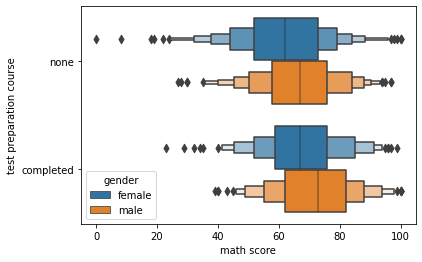

In [47]:
sns.boxenplot(x='math score', y='test preparation course', data=df,
             hue='gender')

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

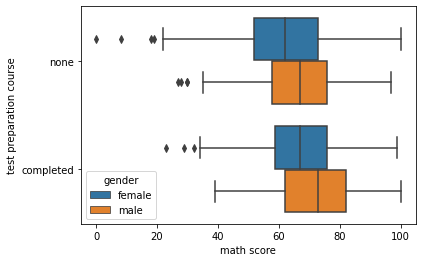

In [48]:
sns.boxplot(x='math score', y='test preparation course', data=df,
             hue='gender')

# box plota çevirdim. ikisini kıyasla.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

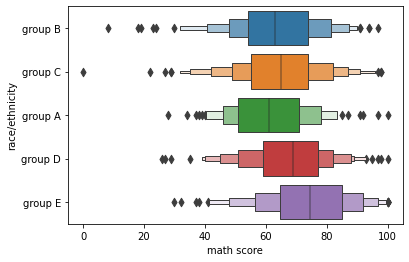

In [23]:
sns.boxenplot(x='math score',y='race/ethnicity',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

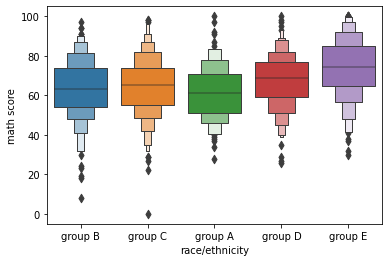

In [24]:
sns.boxenplot(x='race/ethnicity',y='math score',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

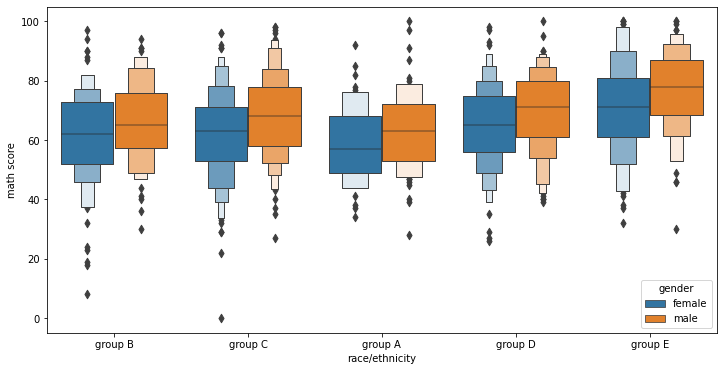

In [25]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='race/ethnicity',y='math score',data=df,hue='gender')

----
----